# Question 2 - Used Car Price Prediction
by: johanescedrick11

### A. The dataset has yet to be analyzed. Analyze it & state any discovered issues! Also, handle the issues found in the dataset & provide reasons for your methods in dealing with each issue!

##### A.1 Import Data and Overview

In [1]:
import pandas as pd

In [2]:
# import data
df = pd.read_parquet('Data/2B.parquet')
df.head()

,Sales_ID,name,year,selling_price,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,4333,Maruti,2018,6000.0,Central,Nebraska,Norfolk,Petrol,Dealer,Automatic,First_Owner,22.0,1197,81.80,113Nm@ 4200rpm,5
1,5562,Tata,2012,1400.0,Central,Illinois,Bloomington,Diesel,Individual,Manual,Fourth_Above_Owner,19.09,1396,69.00,135Nm@ 2500rpm,5
2,6854,Chevrolet,2015,4340.0,East,New York,Schenectady,Diesel,Individual,Manual,First_Owner,13.58,2499,72.40,171Nm@ 1800rpm,10
3,8113,Ford,2018,7460.0,South,North Carolina,Mooresville,Diesel,Individual,Manual,First_Owner,24.4,1498,98.63,215Nm@ 1750-3000rpm,5
4,6986,Tata,2017,3700.0,East,Maryland,Silver Spring,Petrol,Individual,Manual,First_Owner,17.57,1193,88.70,140Nm@ 1500-4000rpm,5


In [3]:
# lets check the data info (data types, non-null values, etc.)
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_ID           4200 non-null   int64  
 1   name               4200 non-null   object 
 2   year               4200 non-null   int64  
 3   selling_price      4199 non-null   float64
 4   Region             4200 non-null   object 
 5   State or Province  4200 non-null   object 
 6   City               4200 non-null   object 
 7   fuel               4200 non-null   object 
 8   seller_type        4200 non-null   object 
 9   transmission       4200 non-null   object 
 10  owner              4200 non-null   object 
 11  mileage            4200 non-null   object 
 12  engine             4200 non-null   int64  
 13  max_power          4200 non-null   float64
 14  torque             4200 non-null   object 
 15  seats              4200 non-null   int64  
dtypes: float64(2), int64(4),

Saya menemukan beberapa Data Type yang tidak sesuai dengan kolomnya, serta ada 1 missing value. Mari kita recheck kembali.

In [4]:
#lets check for the missing values first
df.isnull().sum()

Sales_ID             0
name                 0
year                 0
selling_price        1
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
torque               0
seats                0
dtype: int64

Ternyata benar, terdapat 1 missing value pada kolom target kita yaitu kolom selling price. Jika terdapat missing value pada selling price, maka kita tidak dapat melakukan imputasi.

In [5]:
# check row yang memiliki missing value
df[df['selling_price'].isnull()]

,Sales_ID,name,year,selling_price,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
2628,7951,Maruti,2017,NaN,South,Virginia,Hampton,Petrol,Individual,Manual,First_Owner,22.0,1197,81.8,113Nm@ 4200rpm,5


In [6]:
df = df.dropna(subset=['selling_price'])

In [7]:
# cek kembali hasilnya apakah sudah benar
df.isnull().sum()

Sales_ID             0
name                 0
year                 0
selling_price        0
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
torque               0
seats                0
dtype: int64

Setelah mengatasi data yang memiliki missing value, sekarang mari kita periksa data yang memiliki duplikat

In [8]:
# check duplicates
df.duplicated().sum()

np.int64(0)

Saya tidak menemukan ada duplicate data di dalam dataset.

#### A.2 Exploring Columns

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(
    style="whitegrid",
    context="notebook",
    rc={
        "axes.edgecolor": "#EEEEEE",
        "axes.facecolor": "#F9FAFB",
        "grid.color": "#E5E7EB",
        "axes.labelcolor": "#374151",
        "xtick.color": "#6B7280",
        "ytick.color": "#6B7280",
        "axes.titlesize": 14,
        "axes.titleweight": "semibold",
        "axes.titlecolor": "#374151",
    }
)

sns.set_palette(
    sns.color_palette(["#0f766e", "#14b8a6", "#2dd4bf", "#5eead4", "#99f6e4"])
)

In [10]:
df.dtypes

Sales_ID               int64
name                  object
year                   int64
selling_price        float64
Region                object
State or Province     object
City                  object
fuel                  object
seller_type           object
transmission          object
owner                 object
mileage               object
engine                 int64
max_power            float64
torque                object
seats                  int64
dtype: object

In [11]:
# check unique values in categorical columns
df.select_dtypes(include=['object']).nunique()

name                   31
Region                  4
State or Province      49
City                 1187
fuel                    5
seller_type             3
transmission            2
owner                   5
mileage               354
torque                380
dtype: int64

##### A.2.1 Sales_ID

In [12]:
df = df.drop(columns=['Sales_ID'])

##### A.2.2 Name

In [13]:
df['name'].unique()

array(['Maruti', 'Tata', 'Chevrolet', 'Ford', 'Hyundai', 'Mahindra',
       'Skoda', 'Mercedes', 'Toyota', 'Nissan', 'Renault', 'Honda',
       'Jaguar', 'Volkswagen', 'BMW', 'Volvo', 'Audi', 'Datsun', 'Jeep',
       'Fiat', 'Lexus', 'Ambassador', 'Isuzu', 'Mitsubishi', 'Kia',
       'Land', 'MG', 'Force', 'Daewoo', 'Opel', 'Ashok'], dtype=object)

In [14]:
df['name'].value_counts().head(20)

name
Maruti        1278
Hyundai        724
Mahindra       400
Tata           373
Honda          249
Toyota         226
Ford           185
Renault        129
Chevrolet      115
Volkswagen      99
BMW             72
Skoda           55
Nissan          50
Volvo           40
Jaguar          39
Datsun          31
Mercedes        28
Audi            23
Fiat            21
Jeep            19
Name: count, dtype: int64

##### A.2.3 Year

In [15]:
df['year'].describe()

count    4199.000000
mean     2014.290784
std        15.891230
min      1994.000000
25%      2012.000000
50%      2015.000000
75%      2017.000000
max      3014.000000
Name: year, dtype: float64

In [16]:
df['year'].value_counts()

year
2017    535
2016    465
2018    436
2015    419
2013    360
2012    334
2014    332
2019    307
2011    288
2010    200
2009    115
2008    109
2007     90
2006     49
2005     42
2020     41
2004     24
2003     16
2002     10
1999      7
2000      6
1998      5
1997      4
2001      2
1996      1
1994      1
3014      1
Name: count, dtype: int64

##### A.2.4 Selling Price

In [17]:
df['selling_price'].describe()

count      4199.000000
mean       6663.725944
std        8474.042636
min         299.990000
25%        2700.000000
50%        4550.000000
75%        7000.000000
max      100000.000000
Name: selling_price, dtype: float64

##### A.2.5 Region

In [18]:
df['Region'].unique()

array(['Central', 'East', 'South', 'West'], dtype=object)

In [19]:
df['Region'].value_counts()

Region
Central    1312
East       1020
West       1014
South       853
Name: count, dtype: int64

##### A.2.6 State or Province

In [20]:
df['State or Province'].unique()

array(['Nebraska', 'Illinois', 'New York', 'North Carolina', 'Maryland',
       'California', 'Iowa', 'Virginia', 'Tennessee', 'Georgia',
       'Florida', 'Michigan', 'South Carolina', 'Massachusetts',
       'Kentucky', 'Washington', 'Ohio', 'Arizona', 'Texas', 'Utah',
       'Minnesota', 'Idaho', 'Nevada', 'Indiana', 'New Jersey',
       'West Virginia', 'Colorado', 'New Mexico', 'District of Columbia',
       'Wisconsin', 'Rhode Island', 'Oklahoma', 'Connecticut', 'Arkansas',
       'Vermont', 'Mississippi', 'Oregon', 'Maine', 'North Dakota',
       'Kansas', 'South Dakota', 'Pennsylvania', 'Alabama', 'Missouri',
       'Louisiana', 'Montana', 'New Hampshire', 'Wyoming', 'Delaware'],
      dtype=object)

##### A.2.7 Fuel

In [21]:
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', ''], dtype=object)

Saya menemukan anomali pada kolom fuel, yaitu terdapat kolom kosong yang tidak terdeteksi oleh isnull function

In [22]:
df[df['fuel'] == ""]

,name,year,selling_price,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
2778,Maruti,2013,2250.0,West,Colorado,Castle Rock,,Trustmark_Dealer,Manual,First_Owner,21.79,998,67.05,90Nm@ 3500rpm,5
2878,Maruti,2017,4000.0,East,Connecticut,Shelton,,Individual,Manual,First_Owner,20.51,998,67.04,90Nm@ 3500rpm,5
3268,Renault,2016,3500.0,South,Georgia,Atlanta,,Individual,Manual,First_Owner,23.01,999,67.00,91Nm@ 4250rpm,5


Dikarenakan hanya terdapat sedikit data yang kehilangan kolom fuel, maka saya akan impute menggunakan modus dari brand mobil.

In [23]:
df['fuel'] = df['fuel'].replace('', pd.NA)
brand_mode = df.groupby('name')['fuel'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else df['fuel'].mode()[0])
df['fuel'] = df.apply(lambda r: brand_mode[r['name']] if pd.isna(r['fuel']) else r['fuel'], axis=1)

In [24]:
df.loc[[2778, 2878, 3268]]

,name,year,selling_price,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
2778,Maruti,2013,2250.0,West,Colorado,Castle Rock,Petrol,Trustmark_Dealer,Manual,First_Owner,21.79,998,67.05,90Nm@ 3500rpm,5
2878,Maruti,2017,4000.0,East,Connecticut,Shelton,Petrol,Individual,Manual,First_Owner,20.51,998,67.04,90Nm@ 3500rpm,5
3268,Renault,2016,3500.0,South,Georgia,Atlanta,Diesel,Individual,Manual,First_Owner,23.01,999,67.00,91Nm@ 4250rpm,5


##### A.2.8 Seller Type

In [25]:
df['seller_type'].unique()

array(['Dealer', 'Individual', 'Trustmark_Dealer'], dtype=object)

In [26]:
df['seller_type'].value_counts()

seller_type
Individual          3472
Dealer               610
Trustmark_Dealer     117
Name: count, dtype: int64

##### A.2.9 Tranmission

In [27]:
df['transmission'].unique()

array(['Automatic', 'Manual'], dtype=object)

In [28]:
df['transmission'].value_counts()

transmission
Manual       3616
Automatic     583
Name: count, dtype: int64

##### A.2.10 Owner

In [29]:
df['owner'].unique()

array(['First_Owner', 'Fourth_Above_Owner', 'Second_Owner', 'Third_Owner',
       'Test_Drive_Car'], dtype=object)

In [30]:
df['owner'].value_counts()

owner
First_Owner           2806
Second_Owner          1045
Third_Owner            267
Fourth_Above_Owner      78
Test_Drive_Car           3
Name: count, dtype: int64

##### A.2.11 Mileage

In [31]:
df[df['mileage'].str.match(r'^\s*[-+]?\d+(\.\d+)?\s*$') == False]

,name,year,selling_price,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
2617,Hyundai,2017,5500.0,East,Maine,Westbrook,Petrol,Individual,Manual,First_Owner,"18,6",1197,81.83,114.7Nm@ 4000rpm,5
2736,Maruti,2016,2600.0,Central,Texas,Hurst,Petrol,Individual,Manual,First_Owner,"23,95",998,67.05,90Nm@ 3500rpm,5


Ternyata terdapat 2 data pada mileage yang tidak menggunakan pemisah decimal yang benar, maka perlu diperbaiki agar dapat di convert menjadi numerical col

In [32]:
df['mileage'] = df['mileage'].str.replace(',', '.').astype(float)

##### A.2.12 Engine

In [33]:
df['engine'].describe()

count    4199.000000
mean     1451.378662
std       493.489898
min       624.000000
25%      1197.000000
50%      1248.000000
75%      1582.000000
max      3604.000000
Name: engine, dtype: float64

##### A.2.13 Max Power

In [34]:
df['max_power'].describe()

count    4199.000000
mean       91.694675
std        35.904675
min        32.800000
25%        68.050000
50%        82.500000
75%       102.000000
max       400.000000
Name: max_power, dtype: float64

##### A.2.14

In [35]:
df['torque'].unique()

array(['113Nm@ 4200rpm', '135Nm@ 2500rpm', '171Nm@ 1800rpm',
       '215Nm@ 1750-3000rpm', '140Nm@ 1500-4000rpm',
       '180.4Nm@ 1750-2500rpm', '219.7Nm@ 1500-2750rpm',
       '114.7Nm@ 4000rpm', '90.3Nm@ 4200rpm', '190Nm@ 2000rpm',
       '277.5Nm@ 1700-2200rpm', '150Nm@ 1700-4500rpm', '160Nm@ 2000rpm',
       '200Nm@ 1750rpm', '153Nm@ 3800rpm', '90Nm@ 3500rpm',
       '259.9Nm@ 1900-2750rpm', '500Nm@ 1600-1800rpm',
       '205Nm@ 1800-2800rpm', '6.1@ 3,000(kgm@ rpm)',
       '180Nm@ 1440-1500rpm', '69Nm@ 3500rpm', '62Nm@ 3000rpm',
       '134Nm@ 4000rpm', '200Nm@ 1750-3000rpm',
       '20.4@ 1400-3400(kgm@ rpm)', '200Nm@ 1200-3600rpm',
       '205Nm@ 1750-3250rpm', '259.8Nm@ 1900-2750rpm',
       '320Nm@ 1750-2500rpm', '360Nm@ 1200-3400rpm', '110Nm@ 4500rpm',
       '151NM@ 4850rpm', '77Nm@ 3500rpm', '330Nm@ 1600-2800rpm',
       '430Nm@ 1750-2500rpm', '16@ 2,000(kgm@ rpm)',
       '170Nm@ 1750-4000rpm', '240Nm@ 1600-2800rpm',
       '343Nm@ 1400-2800rpm', '280Nm@ 1800-2800rpm', '9

Dari informasi di atas, saya menemukan bahwa kolom torque memiliki format dan satuan yang inkonsisten

In [36]:
import re
import numpy as np

def clean_torque_str(s: str):
    if pd.isna(s):
        return ""
    s = s.lower()
    s = s.replace(" ", "").replace(",", "").replace("+/-", "")
    return s

def extract_torque_value(s: str):
    s = clean_torque_str(s)
    if s == "":
        return None

    m = re.search(r'(\d+(?:\.\d+)?)(?:(nm|kgm))?', s)
    if not m:
        return None
    
    value = float(m.group(1))
    if "kgm" in s:
        value *= 9.80665 
        
    return round(value, 2)

def extract_max_rpm(s: str):
    s = clean_torque_str(s)
    if not s:
        return None

    m = re.search(r'(\d{3,5})(?:[-/](\d{3,5}))?rpm', s)
    if m:
        r1 = int(m.group(1))
        r2 = int(m.group(2)) if m.group(2) else r1
        return max(r1, r2)

    m = re.search(r'(?:@|at)(\d{3,5})(?:[-/](\d{3,5}))?', s)
    if m:
        r1 = int(m.group(1))
        r2 = int(m.group(2)) if m.group(2) else r1
        return max(r1, r2)
    return None

df["torque_clean"] = df["torque"].apply(clean_torque_str)
df["torque_Nm"] = df["torque_clean"].apply(extract_torque_value)
df["max_rpm"] = df["torque_clean"].apply(extract_max_rpm)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4199 entries, 0 to 4199
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               4199 non-null   object 
 1   year               4199 non-null   int64  
 2   selling_price      4199 non-null   float64
 3   Region             4199 non-null   object 
 4   State or Province  4199 non-null   object 
 5   City               4199 non-null   object 
 6   fuel               4199 non-null   object 
 7   seller_type        4199 non-null   object 
 8   transmission       4199 non-null   object 
 9   owner              4199 non-null   object 
 10  mileage            4199 non-null   float64
 11  engine             4199 non-null   int64  
 12  max_power          4199 non-null   float64
 13  torque             4199 non-null   object 
 14  seats              4199 non-null   int64  
 15  torque_clean       4199 non-null   object 
 16  torque_Nm          4199 non-n

Terdapat beberapa kolom max_rpm yang masih memiliki nilai Null

In [38]:
df[["torque", "torque_clean", "torque_Nm", "max_rpm"]].head(15)

,torque,torque_clean,torque_Nm,max_rpm
0,113Nm@ 4200rpm,113nm@4200rpm,113.0,4200.0
1,135Nm@ 2500rpm,135nm@2500rpm,135.0,2500.0
2,171Nm@ 1800rpm,171nm@1800rpm,171.0,1800.0
3,215Nm@ 1750-3000rpm,215nm@1750-3000rpm,215.0,3000.0
4,140Nm@ 1500-4000rpm,140nm@1500-4000rpm,140.0,4000.0
5,180.4Nm@ 1750-2500rpm,180.4nm@1750-2500rpm,180.4,2500.0
6,219.7Nm@ 1500-2750rpm,219.7nm@1500-2750rpm,219.7,2750.0
7,114.7Nm@ 4000rpm,114.7nm@4000rpm,114.7,4000.0
8,90.3Nm@ 4200rpm,90.3nm@4200rpm,90.3,4200.0
9,190Nm@ 2000rpm,190nm@2000rpm,190.0,2000.0


In [39]:
df[df["torque"].str.contains("kgm", case=False, na=False)][["torque", "torque_clean", "torque_Nm", "max_rpm"]].head(15)

,torque,torque_clean,torque_Nm,max_rpm
21,"6.1@ 3,000(kgm@ rpm)",6.1@3000(kgm@rpm),59.82,3000.0
28,20.4@ 1400-3400(kgm@ rpm),20.4@1400-3400(kgm@rpm),200.06,3400.0
49,"16@ 2,000(kgm@ rpm)",16@2000(kgm@rpm),156.91,2000.0
62,22.4 kgm at 1750-2750rpm,22.4kgmat1750-2750rpm,219.67,2750.0
63,20.4@ 1400-3400(kgm@ rpm),20.4@1400-3400(kgm@rpm),200.06,3400.0
79,"12.7@ 2,700(kgm@ rpm)",12.7@2700(kgm@rpm),124.54,2700.0
128,"24@ 1,900-2,750(kgm@ rpm)",24@1900-2750(kgm@rpm),235.36,2750.0
153,"11.4 kgm at 4,000 rpm",11.4kgmat4000rpm,111.80,4000.0
156,"6.1@ 3,000(kgm@ rpm)",6.1@3000(kgm@rpm),59.82,3000.0
158,6.1kgm@ 3000rpm,6.1kgm@3000rpm,59.82,3000.0


In [40]:
df[~df["torque"].str.contains("nm|kgm", case=False, na=False)][["torque", "torque_clean", "torque_Nm", "max_rpm"]].head(15)

,torque,torque_clean,torque_Nm,max_rpm
936,510@ 1600-2400,510@1600-2400,510.0,2400.0
2280,210 / 1900,210/1900,210.0,NaN
3743,250@ 1250-5000rpm,250@1250-5000rpm,250.0,5000.0
4073,210 / 1900,210/1900,210.0,NaN


In [41]:
df[(df['torque_Nm'] > 700) | (df['torque_Nm'] < 50)][['torque', 'torque_clean', 'torque_Nm', 'max_rpm']]

,torque,torque_clean,torque_Nm,max_rpm
68,"48@ 3,000+/-500(NM@ rpm)",48@3000500(nm@rpm),48.00,30005.0
393,"145@ 4,100(kgm@ rpm)",145@4100(kgm@rpm),1421.96,4100.0
507,380Nm(38.7kgm)@ 2500rpm,380nm(38.7kgm)@2500rpm,3726.53,2500.0
682,48Nm@ 3000rpm,48nm@3000rpm,48.00,3000.0
1013,789Nm@ 2250rpm,789nm@2250rpm,789.00,2250.0
1089,"145@ 4,100(kgm@ rpm)",145@4100(kgm@rpm),1421.96,4100.0
1711,"145@ 4,100(kgm@ rpm)",145@4100(kgm@rpm),1421.96,4100.0
1787,"110@ 3,000(kgm@ rpm)",110@3000(kgm@rpm),1078.73,3000.0
2016,115@ 2500(kgm@ rpm),115@2500(kgm@rpm),1127.76,2500.0
2188,"115@ 2,500(kgm@ rpm)",115@2500(kgm@rpm),1127.76,2500.0


Terdapat beberapa data yang memiliki satuan yang salah, seharusnya dalam Nm

In [42]:
df.loc[393, 'torque_Nm'] = 145
df.loc[507, 'torque_Nm'] = 380
df.loc[1089, 'torque_Nm'] = 145
df.loc[1711, 'torque_Nm'] = 145
df.loc[1787, 'torque_Nm'] = 110
df.loc[2016, 'torque_Nm'] = 115
df.loc[2188, 'torque_Nm'] = 115
df.loc[2432, 'torque_Nm'] = 190
df.loc[2803, 'torque_Nm'] = 115
df.loc[3220, 'torque_Nm'] = 115
df.loc[3243, 'torque_Nm'] = 145
df.loc[3307, 'torque_Nm'] = 145
df.loc[3727, 'torque_Nm'] = 145
df.loc[3810, 'torque_Nm'] = 145

In [43]:
df[(df['max_rpm'] > 10000) | (df['max_rpm'] < 1000)][['torque', 'torque_clean','torque_Nm', 'max_rpm']]

,torque,torque_clean,torque_Nm,max_rpm
68,"48@ 3,000+/-500(NM@ rpm)",48@3000500(nm@rpm),48.0,30005.0
911,51Nm@ 4000+/-500rpm,51nm@4000500rpm,51.0,500.0
2047,51Nm@ 4000+/-500rpm,51nm@4000500rpm,51.0,500.0
2432,"190@ 21,800(kgm@ rpm)",190@21800(kgm@rpm),190.0,21800.0
3055,51Nm@ 4000+/-500rpm,51nm@4000500rpm,51.0,500.0
3424,"48@ 3,000+/-500(NM@ rpm)",48@3000500(nm@rpm),48.0,30005.0
3875,51Nm@ 4000+/-500rpm,51nm@4000500rpm,51.0,500.0
4115,51Nm@ 4000+/-500rpm,51nm@4000500rpm,51.0,500.0


In [44]:
# correct error secara manual
df.loc[68, "max_rpm"] = 3000
df.loc[3424, "max_rpm"] = 3000

df.loc[[911, 2047, 3055, 3875, 4115], "max_rpm"] = 4000

df.loc[2432, "max_rpm"] = 21800

In [45]:
# cek rpm
df[df['max_rpm'].isnull()][['torque', 'torque_clean', 'torque_Nm', 'max_rpm']]

,torque,torque_clean,torque_Nm,max_rpm
444,400Nm,400nm,400.0,NaN
598,400Nm,400nm,400.0,NaN
662,400Nm,400nm,400.0,NaN
797,480Nm,480nm,480.0,NaN
1359,400Nm,400nm,400.0,NaN
1489,400Nm,400nm,400.0,NaN
1670,400Nm,400nm,400.0,NaN
1976,400Nm,400nm,400.0,NaN
2032,400Nm,400nm,400.0,NaN
2111,400Nm,400nm,400.0,NaN


In [46]:
# kita dapat mengisi nilai max_rpm dengan median berdasarkan torque_Nm
df['max_rpm'] = df['max_rpm'].fillna(df.groupby('torque_Nm')['max_rpm'].transform('median'))
df.loc[[2280, 4073], 'max_rpm'] = 1900

In [47]:
# recheck
df[(df['torque_Nm'] == 400) & (df['torque_clean'] == '400nm')]

,name,year,selling_price,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_clean,torque_Nm,max_rpm
444,Volvo,2019,38000.0,East,New York,Elmira,Diesel,Individual,Automatic,First_Owner,18.0,1969,190.0,400Nm,5,400nm,400.0,2500.0
598,Volvo,2019,38000.0,East,Maine,Westbrook,Diesel,Individual,Automatic,First_Owner,18.0,1969,190.0,400Nm,5,400nm,400.0,2500.0
662,Volvo,2019,38000.0,Central,Texas,Eagle Pass,Diesel,Individual,Automatic,First_Owner,18.0,1969,190.0,400Nm,5,400nm,400.0,2500.0
1359,Volvo,2019,38000.0,East,Pennsylvania,Bethel Park,Diesel,Individual,Automatic,First_Owner,18.0,1969,190.0,400Nm,5,400nm,400.0,2500.0
1489,Volvo,2019,38000.0,South,Georgia,Martinez,Diesel,Individual,Automatic,First_Owner,18.0,1969,190.0,400Nm,5,400nm,400.0,2500.0
1670,Volvo,2019,38000.0,West,California,Los Angeles,Diesel,Individual,Automatic,First_Owner,18.0,1969,190.0,400Nm,5,400nm,400.0,2500.0
1976,Volvo,2019,38000.0,East,New York,Syracuse,Diesel,Individual,Automatic,First_Owner,18.0,1969,190.0,400Nm,5,400nm,400.0,2500.0
2032,Volvo,2019,38000.0,Central,Kansas,Prairie Village,Diesel,Individual,Automatic,First_Owner,18.0,1969,190.0,400Nm,5,400nm,400.0,2500.0
2111,Volvo,2019,38000.0,Central,Texas,Lufkin,Diesel,Individual,Automatic,First_Owner,18.0,1969,190.0,400Nm,5,400nm,400.0,2500.0
2156,Volvo,2019,38000.0,West,Washington,Tacoma,Diesel,Individual,Automatic,First_Owner,18.0,1969,190.0,400Nm,5,400nm,400.0,2500.0


In [48]:
df.isnull().sum()

name                 0
year                 0
selling_price        0
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
torque               0
seats                0
torque_clean         0
torque_Nm            0
max_rpm              1
dtype: int64

In [49]:
df = df.dropna()
df.isnull().sum()

name                 0
year                 0
selling_price        0
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
torque               0
seats                0
torque_clean         0
torque_Nm            0
max_rpm              0
dtype: int64

##### A.2.15 Seats

In [50]:
df['seats'].unique()

array([ 5, 10,  8,  9,  7,  4,  6, 14,  2])

In [51]:
df['seats'].value_counts()

seats
5     3368
7      581
8      109
4       60
9       42
6       25
10      11
14       1
2        1
Name: count, dtype: int64

In [52]:
df[df['seats'] == 2]

,name,year,selling_price,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_clean,torque_Nm,max_rpm
1546,Mahindra,2019,7220.0,South,Florida,Bradenton,Diesel,Individual,Manual,First_Owner,0.0,2523,70.0,200Nm@ 1400-2200rpm,2,200nm@1400-2200rpm,200.0,2200.0


Setelah saya cek ternyata memang terdapat mobil Mahindra dengan 2 seat (mobil pickup)

### A.3 EDA

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(
    style="whitegrid",
    context="notebook",
    rc={
        "axes.edgecolor": "#EEEEEE",
        "axes.facecolor": "#F9FAFB",
        "grid.color": "#E5E7EB",
        "axes.labelcolor": "#374151",
        "xtick.color": "#6B7280",
        "ytick.color": "#6B7280",
        "axes.titlesize": 14,
        "axes.titleweight": "semibold",
        "axes.titlecolor": "#374151",
    }
)

sns.set_palette(
    sns.color_palette(["#0f766e", "#14b8a6", "#2dd4bf", "#5eead4", "#99f6e4"])
)

In [54]:
df = df.drop(columns=['torque', 'torque_clean'])

In [55]:
df.describe()

,year,selling_price,mileage,engine,max_power,seats,torque_Nm,max_rpm
count,4198.00000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000
mean,2014.28990,6652.211825,19.488537,1451.255360,91.660538,5.400905,178.267720,3061.816103
std,15.89302,8442.137966,4.390857,493.483992,35.840739,0.945536,90.522631,950.075662
min,1994.00000,299.990000,-100.000000,624.000000,32.800000,2.000000,48.000000,1400.000000
25%,2012.00000,2700.000000,16.800000,1197.000000,68.050000,5.000000,111.800000,2250.000000
50%,2015.00000,4550.000000,19.400000,1248.000000,82.450000,5.000000,172.500000,3000.000000
75%,2017.00000,7000.000000,22.370000,1582.000000,102.000000,5.000000,209.000000,4000.000000
max,3014.00000,100000.000000,42.000000,3604.000000,400.000000,14.000000,789.000000,21800.000000


In [56]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns
num_col.tolist()

['year',
 'selling_price',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'torque_Nm',
 'max_rpm']

In [57]:
cat_col = df.select_dtypes(include=['object']).columns
cat_col.tolist()

['name',
 'Region',
 'State or Province',
 'City',
 'fuel',
 'seller_type',
 'transmission',
 'owner']

Dari summary yang kita dapat dari .describe, kita dapat menyadari beberapa outlier yang terdapat pada data kita. Mari kita lihat lebih lanjut

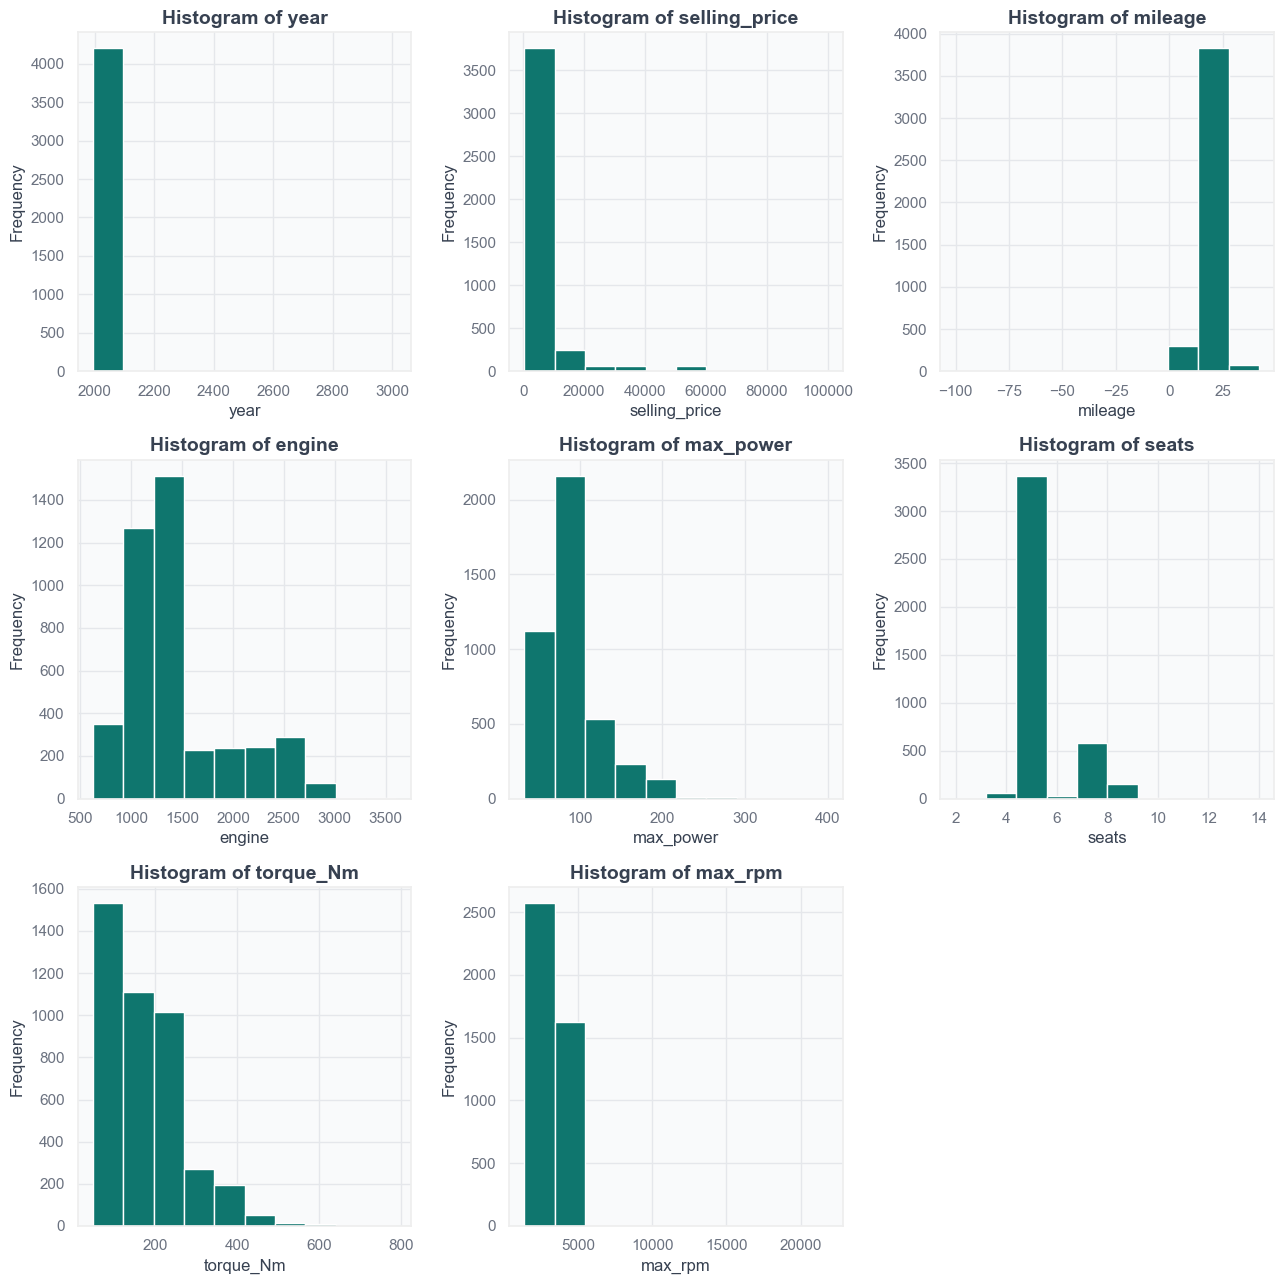

In [58]:
plt.figure(figsize=(13,13))

for i, col in enumerate(num_col, 1):
    plt.subplot(3, 3, i)   
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()

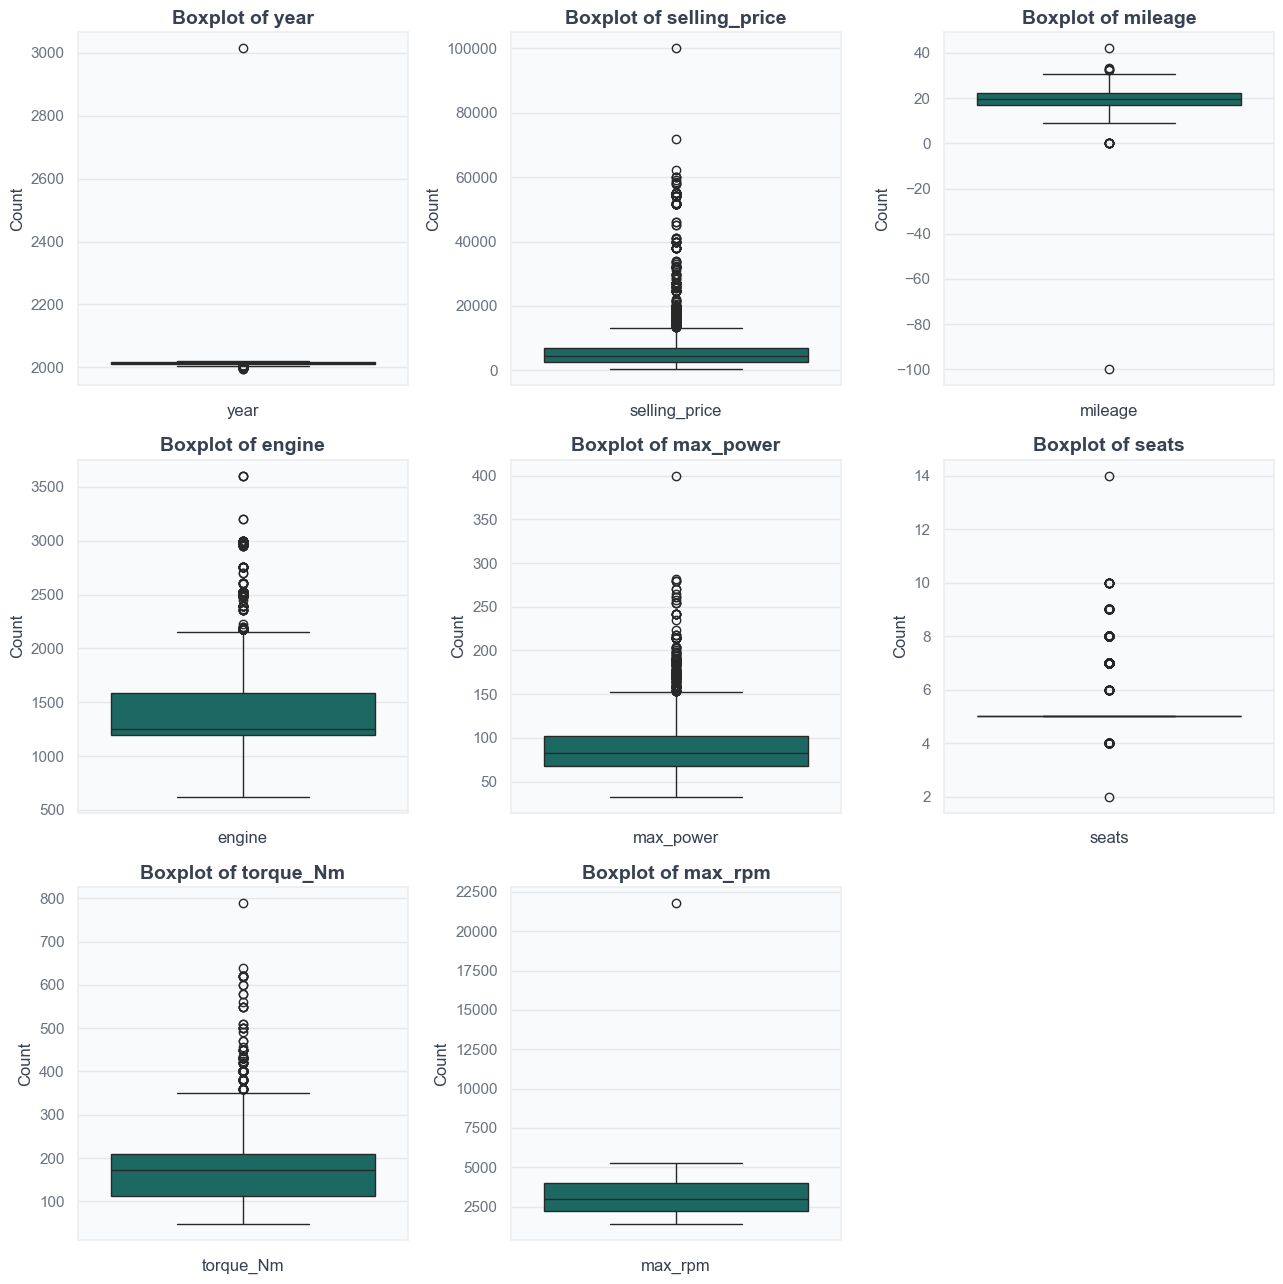

In [59]:
plt.figure(figsize=(13,13))
for i, col in enumerate(num_col, 1):
    plt.subplot(3, 3, i)   
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

Dari graph yang kita lihat di atas, kita dapat menemukan beberapa data extreme yang tidak masuk akal, yaitu data tahun yang melebihi tahun saat ini, mileage yang bernilai negatif, dan harga yang sangat mahal diatas rata-rata

In [60]:
# handle extreme values di kolom year
df = df[df['year'] <= 2025]

In [61]:
# handle extreme values di mileage
df = df[df['mileage'] >= 0]

In [62]:
df[df['mileage'] == 0]

,name,year,selling_price,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_Nm,max_rpm
936,Mercedes,2011,17000.0,West,California,Stockton,Diesel,Individual,Automatic,Third_Owner,0.0,2987,165.00,5,510.0,2400.0
1546,Mahindra,2019,7220.0,South,Florida,Bradenton,Diesel,Individual,Manual,First_Owner,0.0,2523,70.00,2,200.0,2200.0
2003,Hyundai,2009,1200.0,East,New York,New York City,Petrol,Individual,Manual,Second_Owner,0.0,1086,62.00,5,96.1,3000.0
2251,Volkswagen,2014,5750.0,Central,North Dakota,Mandan,Petrol,Dealer,Automatic,First_Owner,0.0,1197,103.25,5,175.0,4100.0
2452,Hyundai,2008,1050.0,East,New York,North Babylon,Petrol,Individual,Manual,First_Owner,0.0,1086,62.00,5,96.1,3000.0
3022,Land,2013,16500.0,Central,Texas,Victoria,Diesel,Dealer,Automatic,First_Owner,0.0,2179,115.00,5,400.0,2000.0
3408,Hyundai,2008,1750.0,West,California,Temecula,Petrol,Individual,Manual,First_Owner,0.0,1086,62.00,5,96.1,3000.0
3897,Hyundai,2010,1100.0,West,Oregon,Pendleton,Petrol,Individual,Manual,Second_Owner,0.0,1086,62.10,5,96.1,3000.0
4019,Mercedes,2017,33000.0,West,Idaho,Eagle,Diesel,Dealer,Automatic,First_Owner,0.0,1950,194.00,5,400.0,2800.0


Ternyata terdapat beberapa mobil yang memiliki 0 mileage, dimana sangat mustahil used car namun memiliki 0 mileage

In [63]:
df['mileage'] = df['mileage'].replace(0, np.nan)
df['mileage'] = df.groupby('name')['mileage'].transform(lambda x: x.fillna(x.median()))

In [64]:
#handle max_rpm extreme values
df = df.drop(df[df["max_rpm"] > 20000].index)

In [65]:
# check selling_price extreme values
df[df['selling_price'] >= 60000]

,name,year,selling_price,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_Nm,max_rpm
65,BMW,2020,72000.0,South,Florida,Palm Beach Gardens,Diesel,Individual,Automatic,First_Owner,13.38,2993,265.00,7,620.0,2500.0
600,Mercedes,2017,60000.0,West,California,Los Angeles,Diesel,Dealer,Automatic,First_Owner,13.50,2987,254.79,5,620.0,2400.0
807,Audi,2019,62230.0,Central,Missouri,Saint Peters,Petrol,Dealer,Automatic,Test_Drive_Car,15.26,1798,187.74,5,320.0,4100.0
1738,BMW,2018,60000.0,South,Virginia,Suffolk,Diesel,Dealer,Automatic,First_Owner,17.09,2993,261.40,4,620.0,2500.0
2058,Volvo,2017,100000.0,East,New York,New York City,Petrol,Individual,Automatic,First_Owner,42.00,1969,400.00,4,640.0,1740.0
3304,Mercedes,2017,60000.0,South,Louisiana,Baton Rouge,Diesel,Dealer,Automatic,First_Owner,13.50,2987,254.79,5,620.0,2400.0


Di atas saya melihat bahwa mobil-mobil luxury atau sport car memang memiliki price yang lebih tinggi dari biasanya, namun terdapat outlier yaitu mobil Volvo yang memiliki harga 100000USD yang merupakan sebuah outlier pada data

In [66]:
# handle extreme values
df = df.drop(df[df['selling_price'] > 90000].index)

In [67]:
# check extreme engine cc
df[df['engine'] >= 3000]

,name,year,selling_price,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_Nm,max_rpm
814,Jeep,2017,41000.0,West,Idaho,Pocatello,Petrol,Individual,Automatic,First_Owner,9.50,3604,280.0,5,347.0,4300.0
1070,Jeep,2017,41000.0,South,Florida,Pembroke Pines,Petrol,Individual,Automatic,First_Owner,9.50,3604,280.0,5,347.0,4300.0
2252,Ford,2018,32000.0,South,Florida,Land O Lakes,Diesel,Individual,Automatic,First_Owner,10.91,3198,197.0,7,470.0,2500.0
2395,Jeep,2017,41000.0,South,Louisiana,Bossier City,Petrol,Individual,Automatic,First_Owner,9.50,3604,280.0,5,347.0,4300.0
2712,Ford,2018,32500.0,East,Maryland,Camp Springs,Diesel,Individual,Automatic,First_Owner,10.91,3198,197.0,7,470.0,2500.0


Mobil dengan cc tinggi sesuai

In [68]:
# check extreme torque Nm
df[df['torque_Nm'] >= 600]

,name,year,selling_price,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_Nm,max_rpm
65,BMW,2020,72000.0,South,Florida,Palm Beach Gardens,Diesel,Individual,Automatic,First_Owner,13.38,2993,265.00,7,620.0,2500.0
127,Jaguar,2014,20000.0,Central,Michigan,Port Huron,Diesel,Individual,Automatic,First_Owner,14.74,2993,270.90,5,600.0,2000.0
600,Mercedes,2017,60000.0,West,California,Los Angeles,Diesel,Dealer,Automatic,First_Owner,13.50,2987,254.79,5,620.0,2400.0
1013,Maruti,2003,850.0,West,California,Los Angeles,Diesel,Individual,Manual,Third_Owner,20.80,1527,58.00,5,789.0,2250.0
1738,BMW,2018,60000.0,South,Virginia,Suffolk,Diesel,Dealer,Automatic,First_Owner,17.09,2993,261.40,4,620.0,2500.0
2479,Mercedes,2014,25750.0,West,Colorado,Grand Junction,Diesel,Individual,Automatic,First_Owner,11.74,2987,254.80,5,619.0,2400.0
2518,Jaguar,2014,20000.0,Central,Texas,Longview,Diesel,Individual,Automatic,First_Owner,14.74,2993,270.90,5,600.0,2000.0
3304,Mercedes,2017,60000.0,South,Louisiana,Baton Rouge,Diesel,Dealer,Automatic,First_Owner,13.50,2987,254.79,5,620.0,2400.0
3677,BMW,2018,58300.0,South,Arkansas,Conway,Diesel,Individual,Automatic,First_Owner,17.09,2993,261.40,4,620.0,2500.0


Terdapat outlier lagi pada Torque, yaitu terdapat mobil Maruti dengan kapasitas 1500cc namun memili torque yang sangat tinggi yaitu 789 Torque. Ini merupakan outlier

In [69]:
df = df.drop(df[df['torque_Nm'] >= 700].index)

In [70]:
df.describe()

,year,selling_price,mileage,engine,max_power,seats,torque_Nm,max_rpm
count,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000
mean,2014.055330,6633.888681,19.551212,1451.212497,91.609979,5.401145,178.054135,3057.766277
std,3.790719,8322.040669,3.869431,493.532948,35.529981,0.945469,89.775202,905.033304
min,1994.000000,299.990000,9.000000,624.000000,32.800000,2.000000,48.000000,1400.000000
25%,2012.000000,2700.000000,16.800000,1197.000000,68.050000,5.000000,111.800000,2250.000000
50%,2015.000000,4550.000000,19.400000,1248.000000,82.400000,5.000000,172.500000,3000.000000
75%,2017.000000,7000.000000,22.370000,1582.000000,102.000000,5.000000,209.000000,4000.000000
max,2020.000000,72000.000000,33.440000,3604.000000,282.000000,14.000000,620.000000,5300.000000


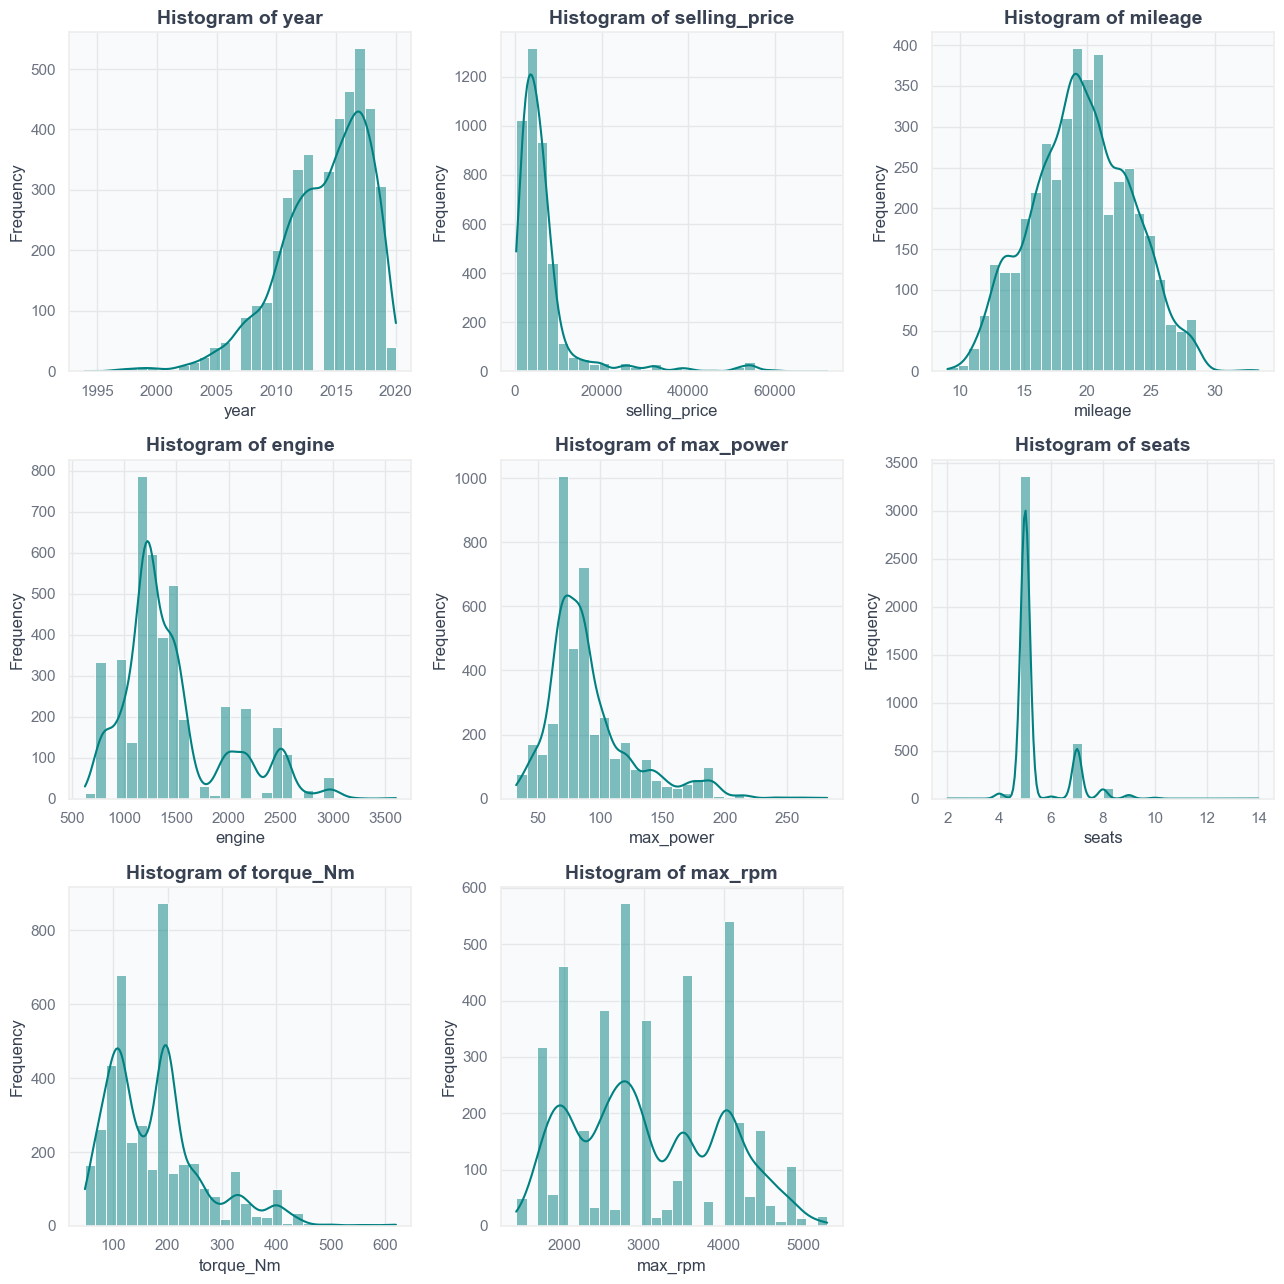

In [71]:
plt.figure(figsize=(13,13))

for i, col in enumerate(num_col, 1):
    plt.subplot(3, 3, i)   
    sns.histplot(df[col], bins=30, kde=True, color="teal")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()

Distribusi terlihat membaik dan sesuai

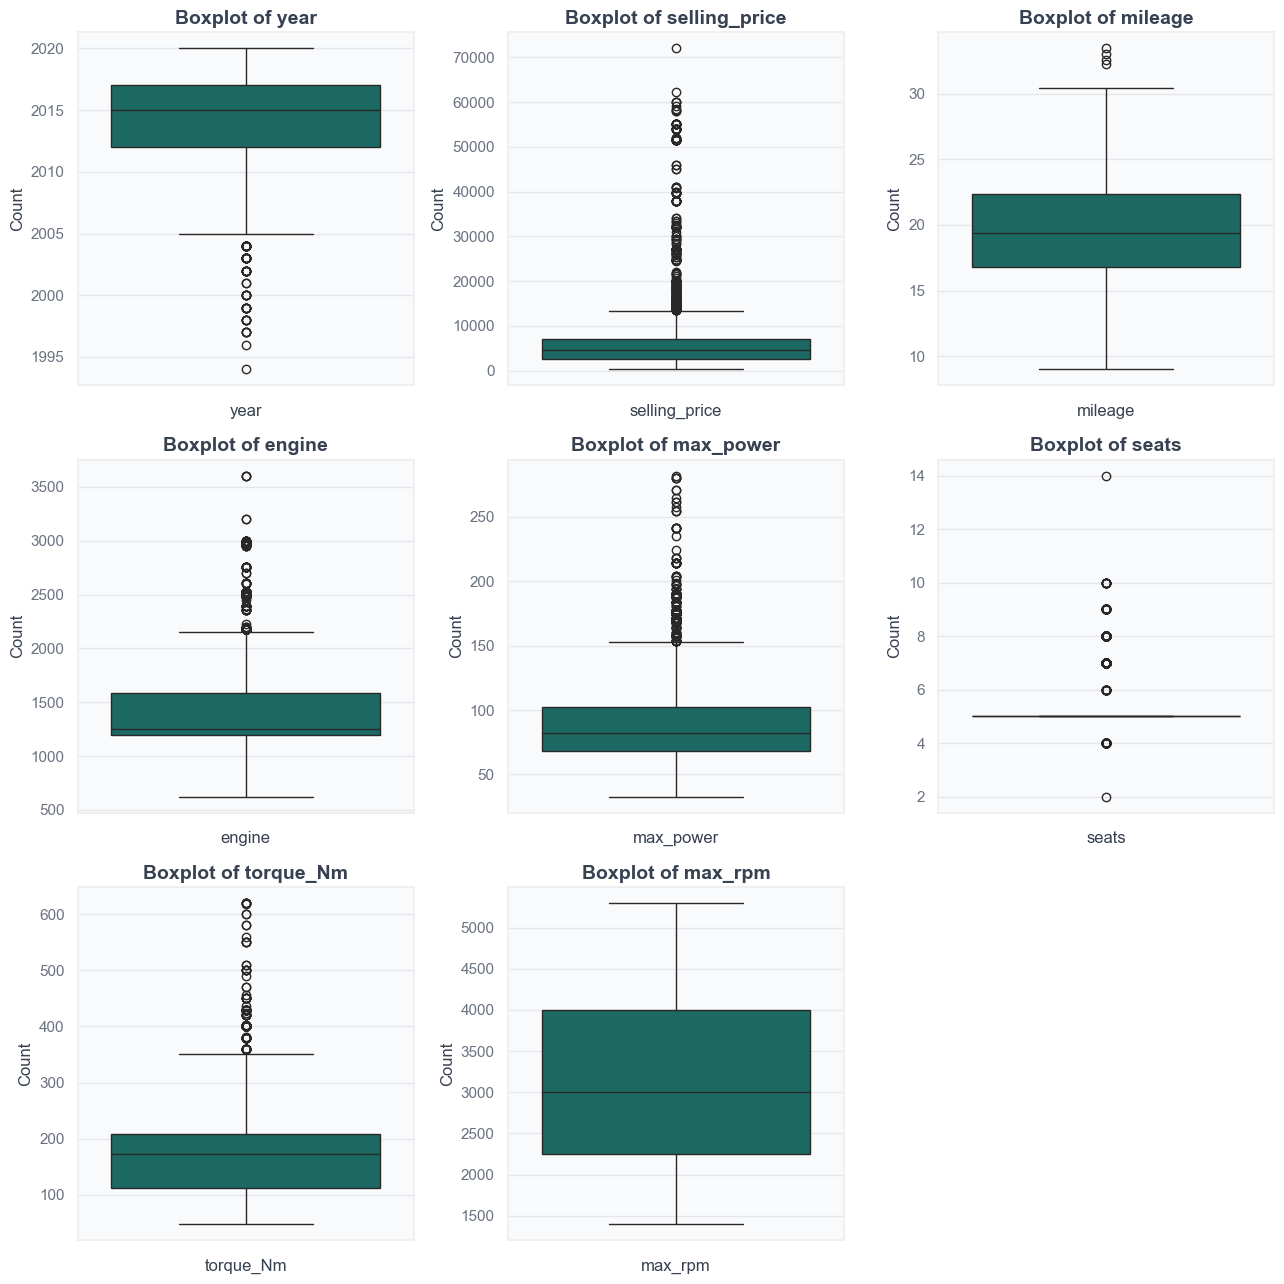

In [72]:
plt.figure(figsize=(13,13))
for i, col in enumerate(num_col, 1):
    plt.subplot(3, 3, i)   
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

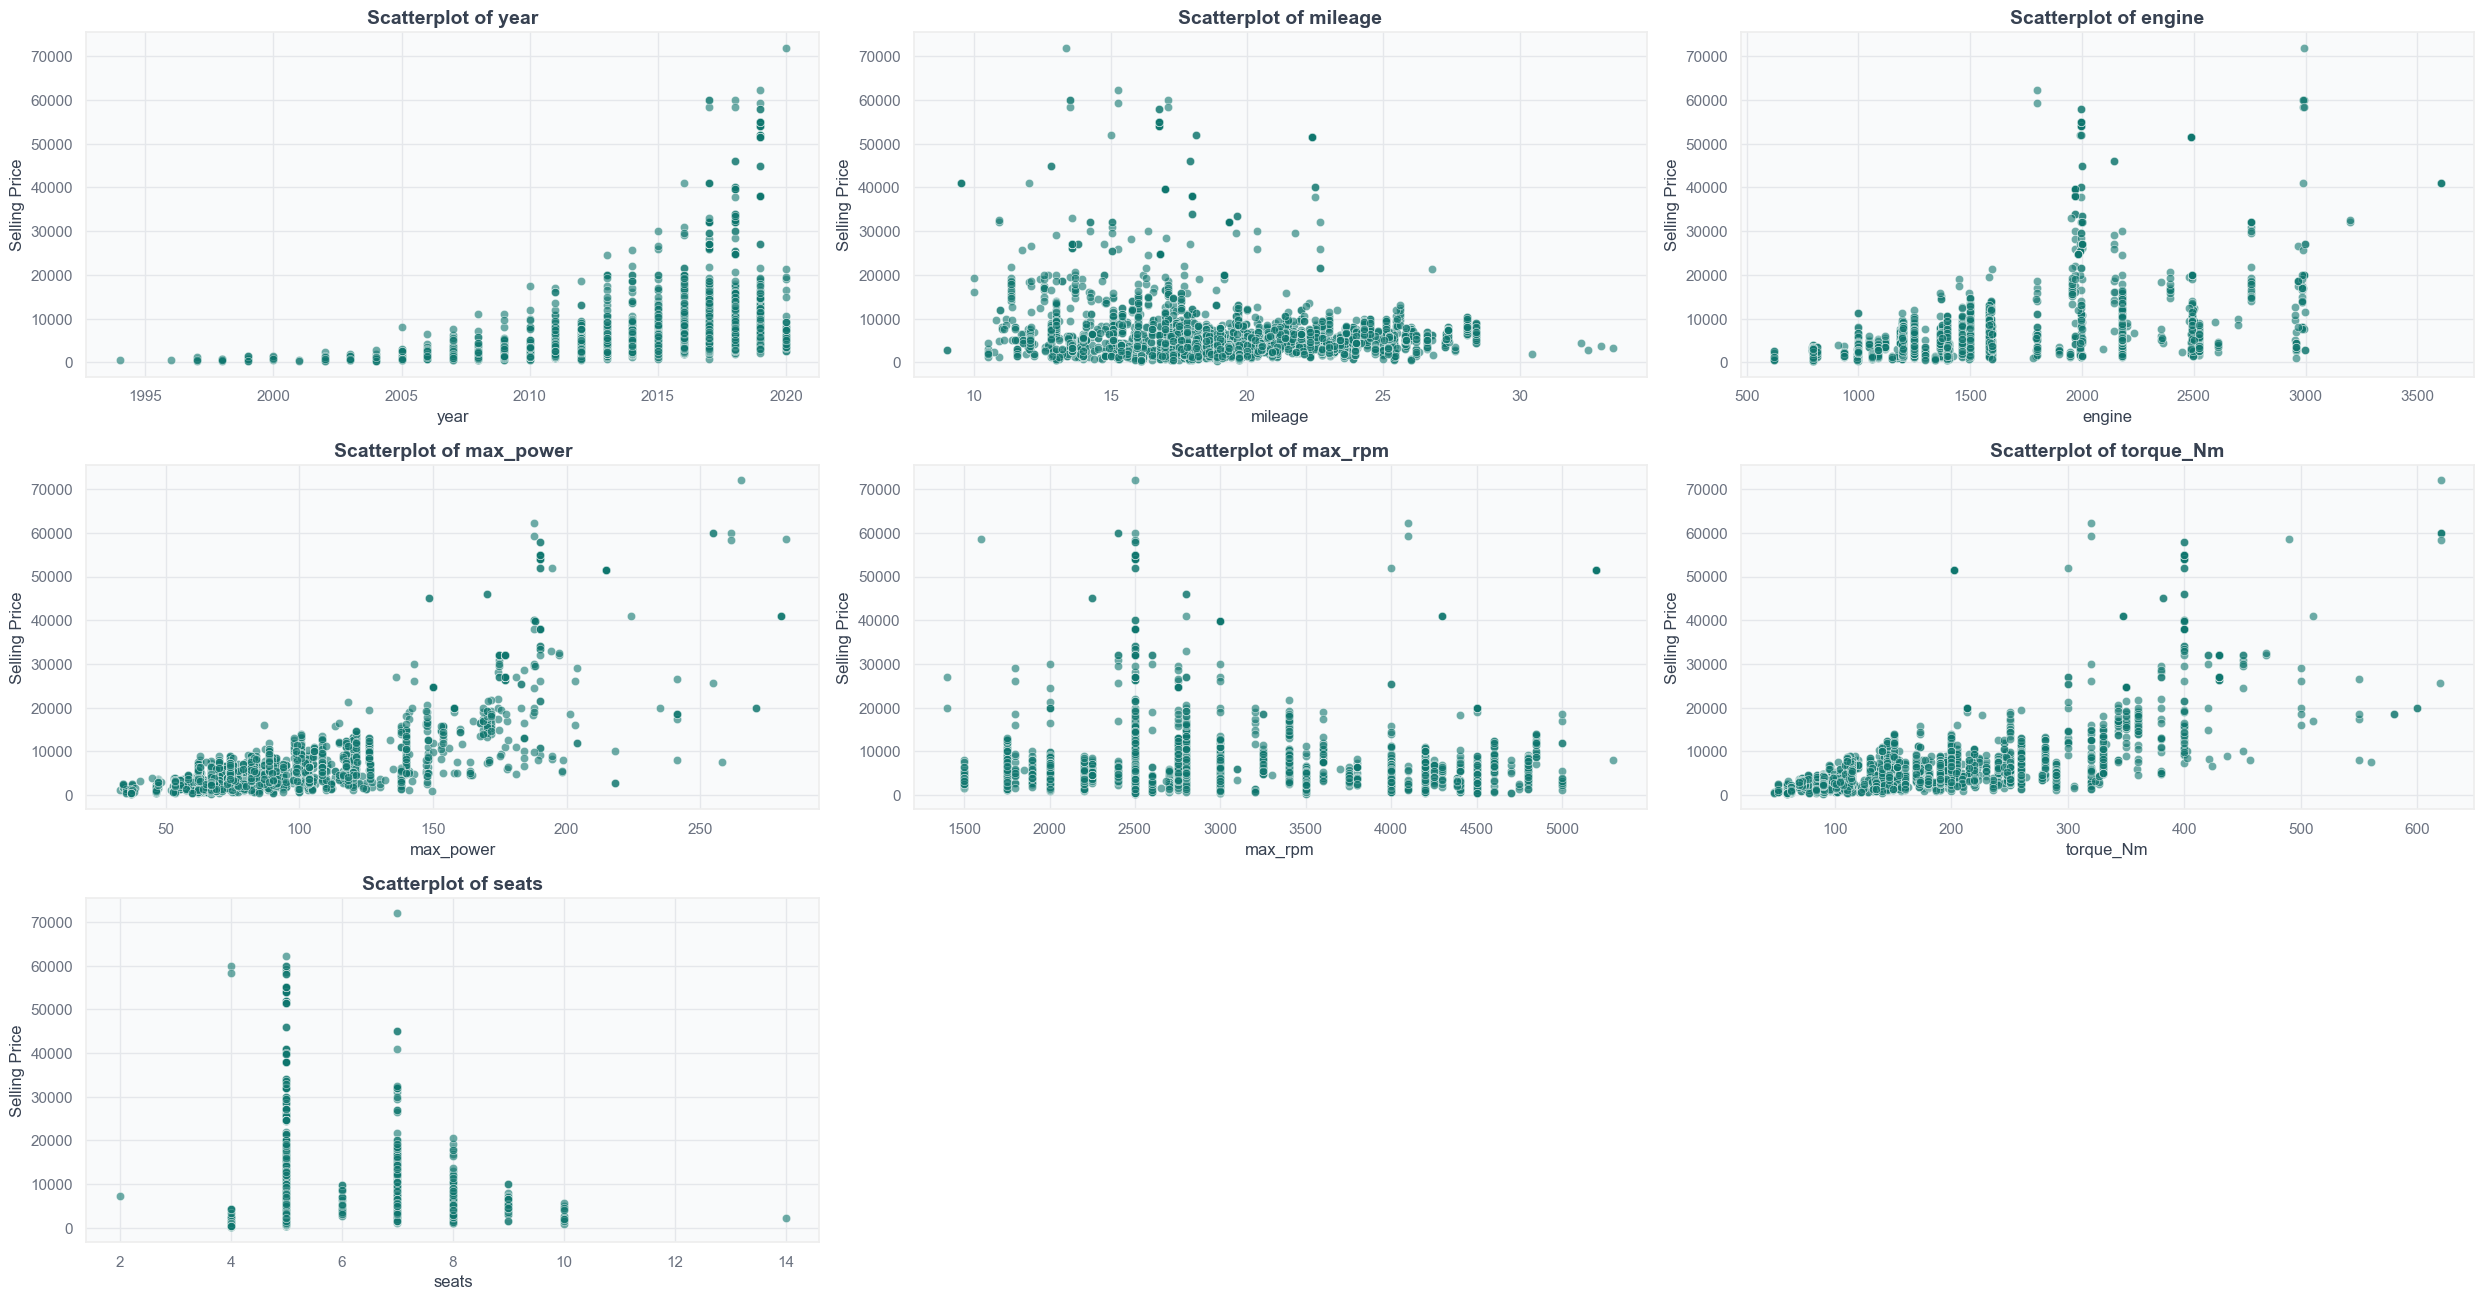

In [73]:
num_col_2 = ['year', 'mileage', 'engine', 'max_power', 'max_rpm', 'torque_Nm', 'seats']
plt.figure(figsize=(25,30))

for i, col in enumerate(num_col_2, 1):
    plt.subplot(7, 3, i)   
    sns.scatterplot(data=df, x=col, y='selling_price', alpha=0.6)
    plt.xlabel(col)
    plt.ylabel("Selling Price")
    plt.title(f"Scatterplot of {col}")
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Correlation Heatmap'}>

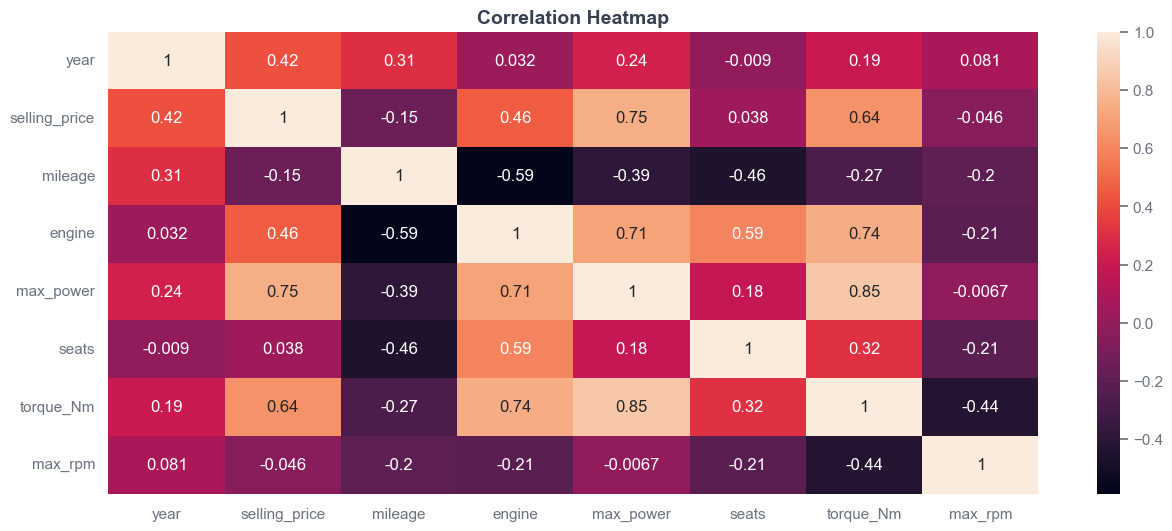

In [74]:
df_corr = (df[num_col]).corr()
plt.figure(figsize=(15,6))
plt.title('Correlation Heatmap')
sns.heatmap(df_corr, annot=True)

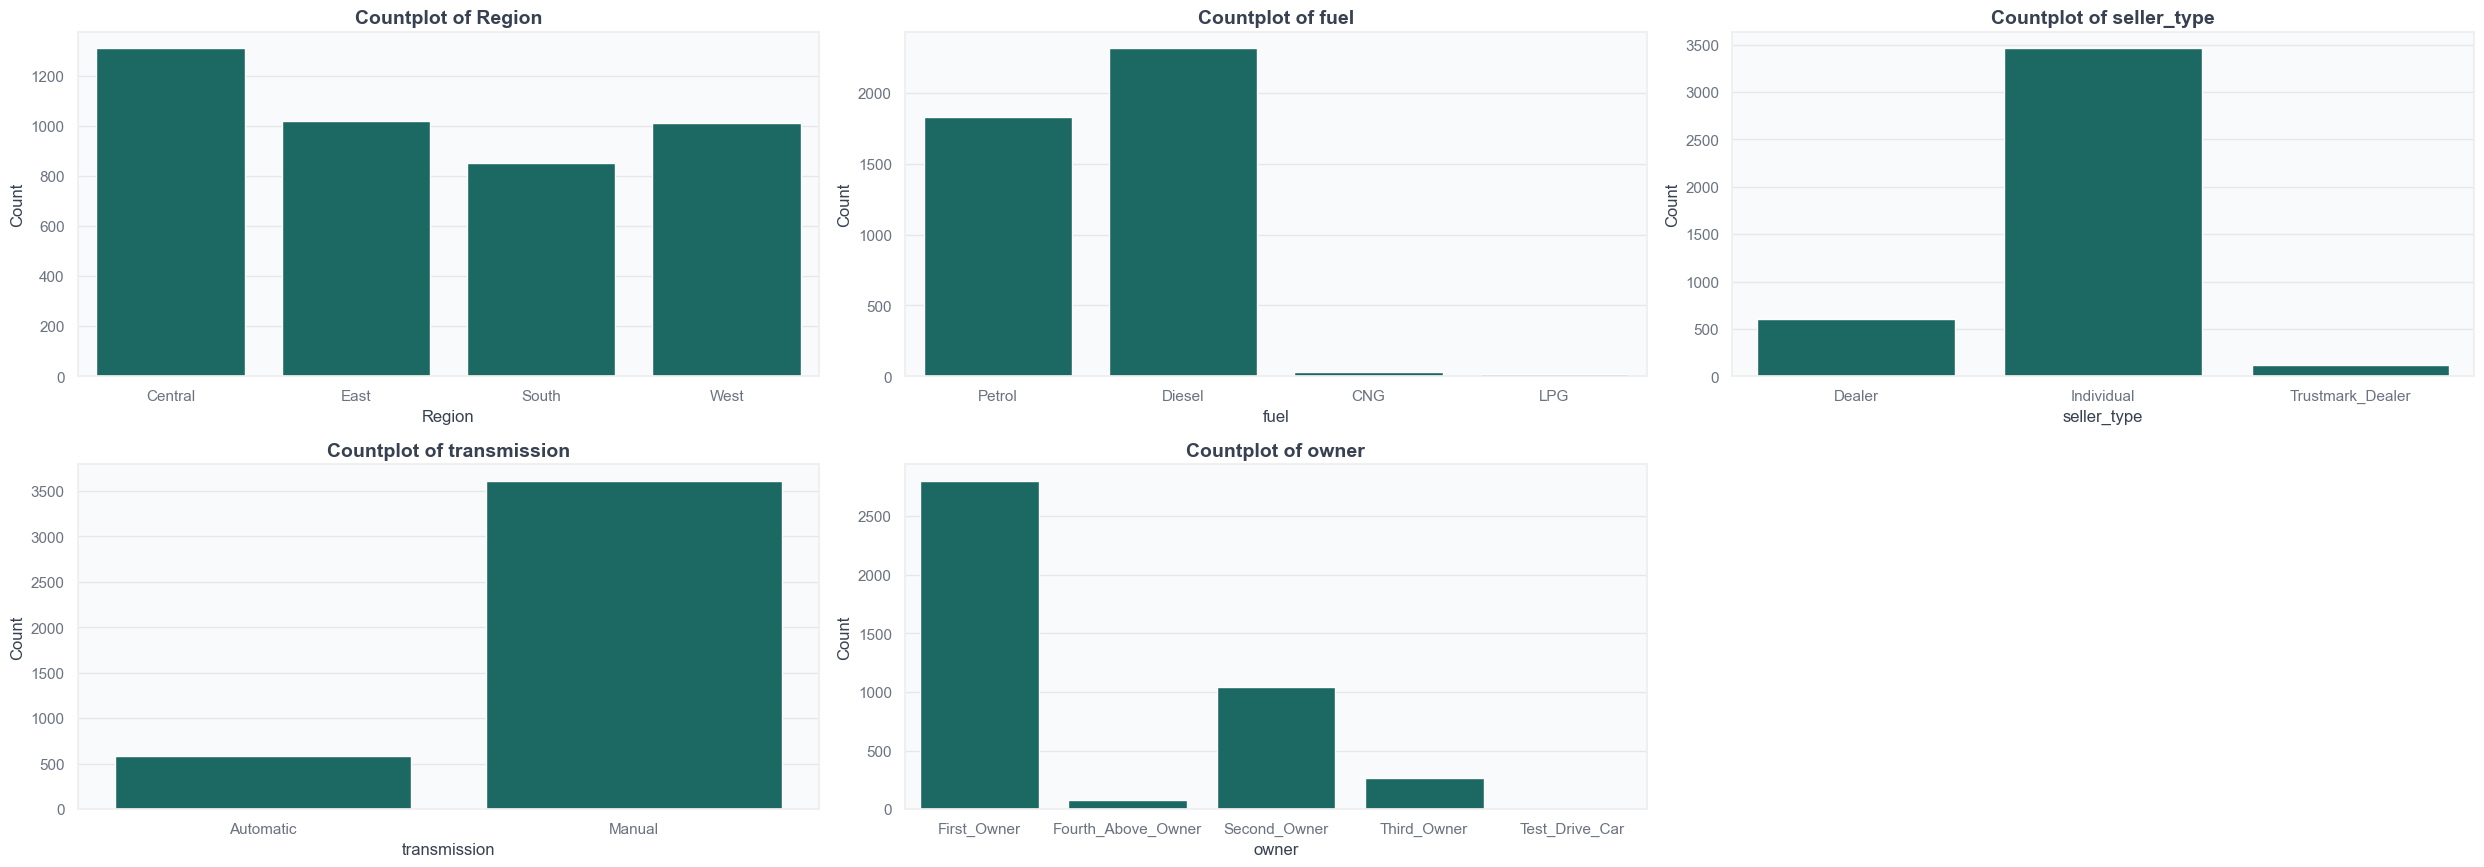

In [75]:
cat_col_2 = ['Region', 'fuel', 'seller_type',
       'transmission', 'owner']
plt.figure(figsize=(25,30))

for i, col in enumerate(cat_col_2, 1):
    plt.subplot(7, 3, i)   
    sns.countplot(x=df[col])
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Countplot of {col}")
plt.tight_layout()
plt.show()

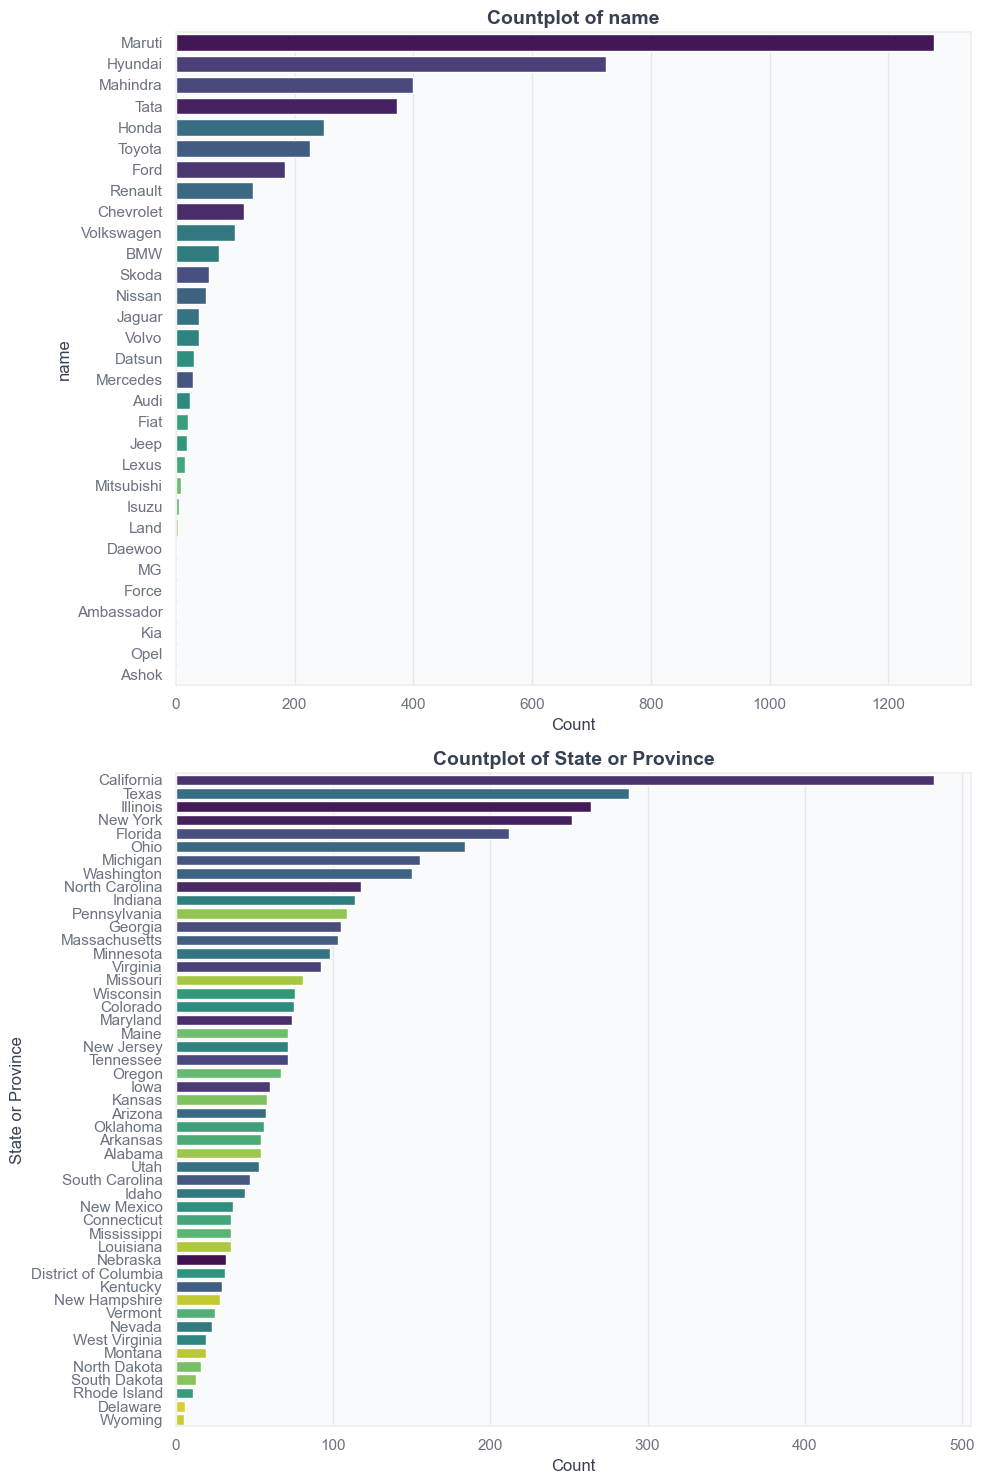

In [76]:
cat_col_3 = ['name', 'State or Province']
plt.figure(figsize=(10, 15))

for i, col in enumerate(cat_col_3, 1):
    plt.subplot(len(cat_col_3), 1, i)
    sns.countplot(
        y=df[col],
        order=df[col].value_counts().index,
        hue=df[col],           
        legend=False,          
        palette="viridis"      
    )
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.title(f"Countplot of {col}", fontsize=14, fontweight='bold')
    plt.tight_layout()

plt.show()


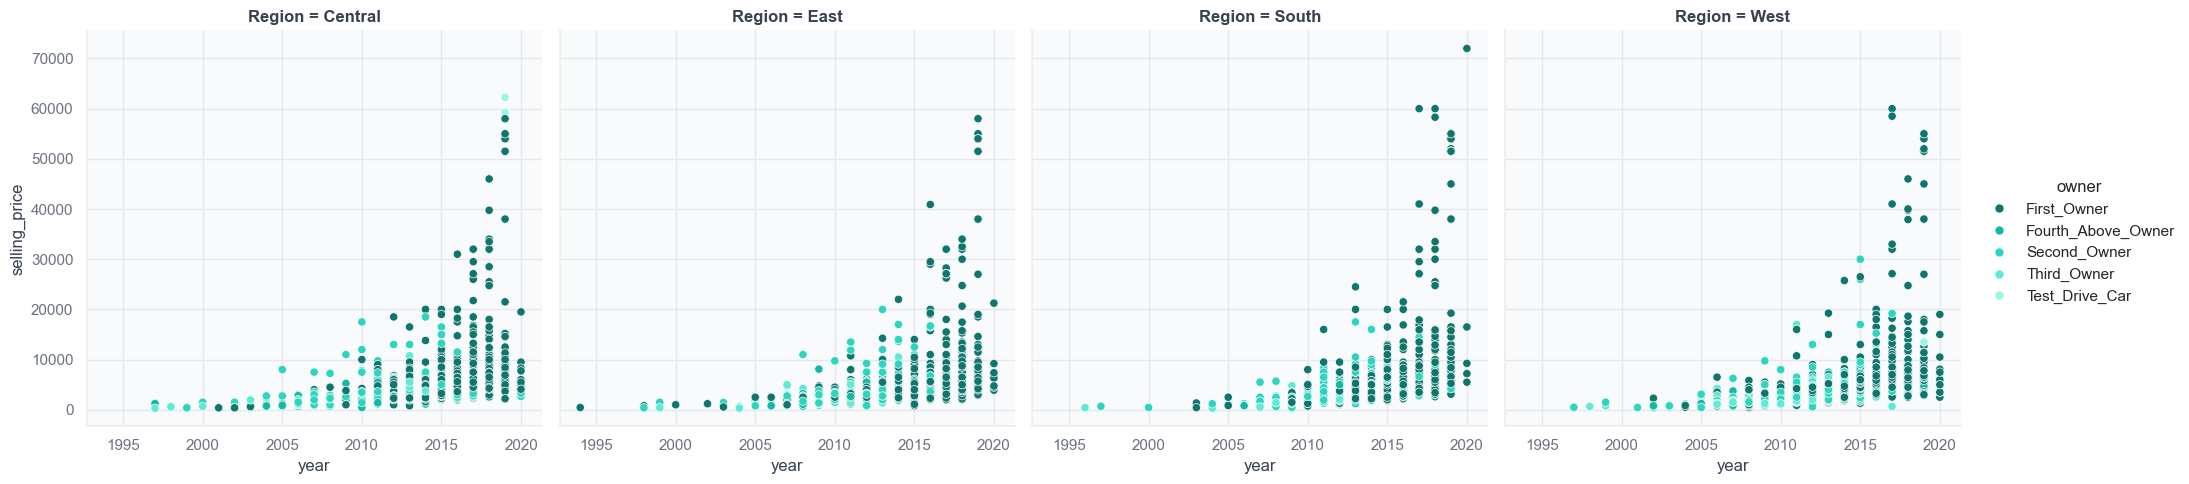

In [77]:
sns.relplot(data=df, x='year', y='selling_price', hue='owner', col='Region')

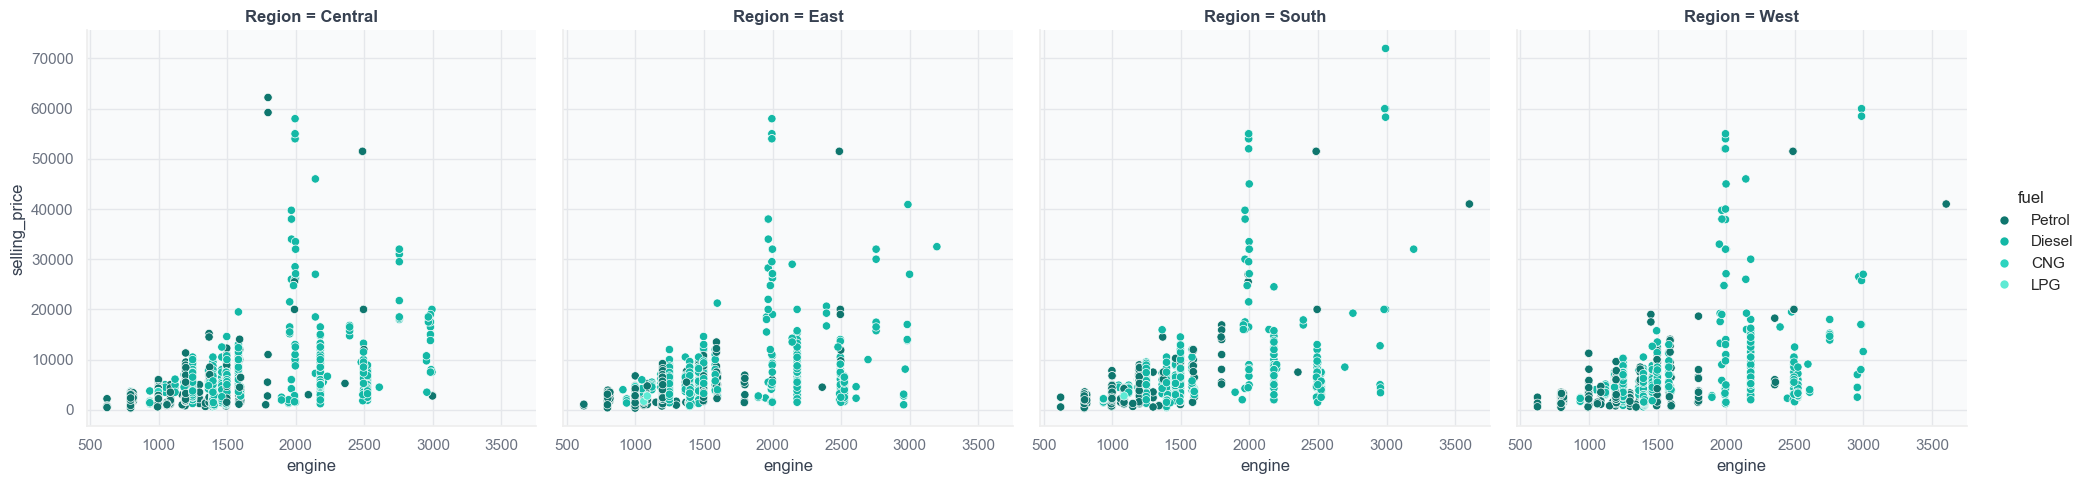

In [78]:
sns.relplot(data=df, x='engine', y='selling_price', hue='fuel', col='Region')

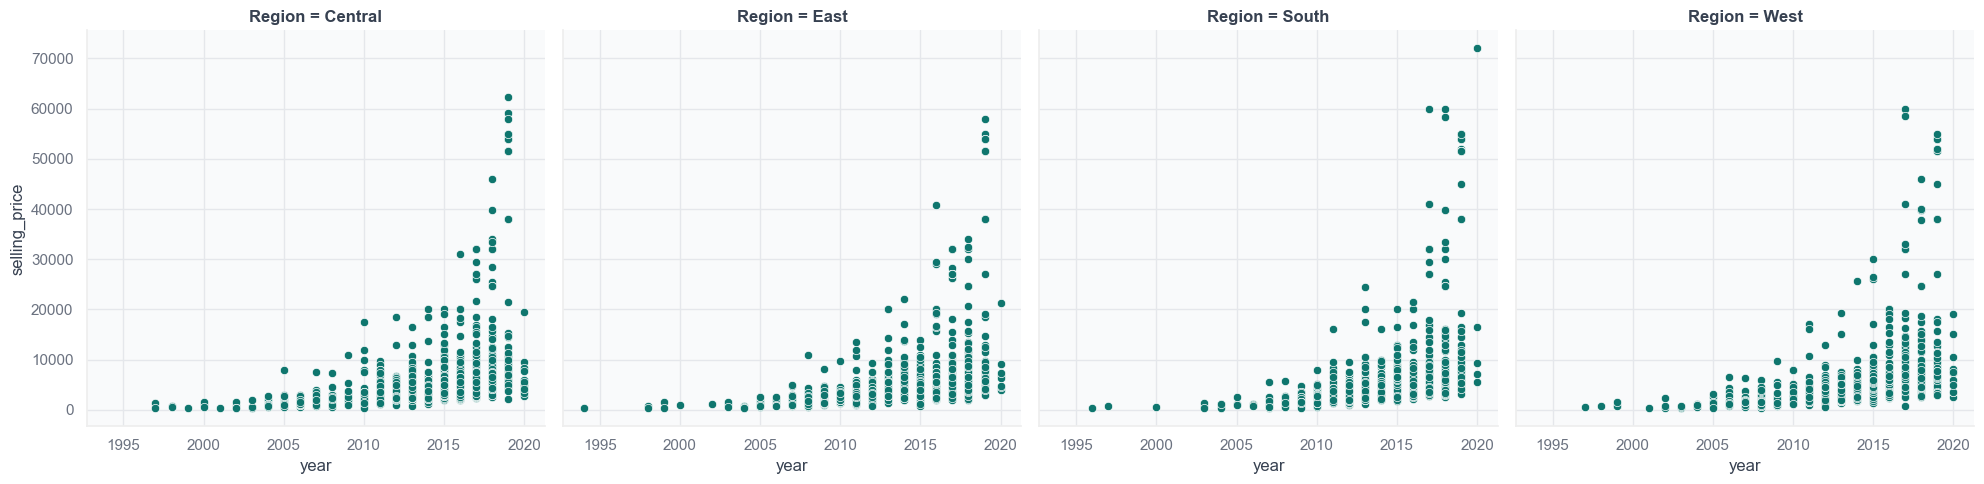

In [79]:
sns.relplot(data=df, x='year', y='selling_price', col='Region')

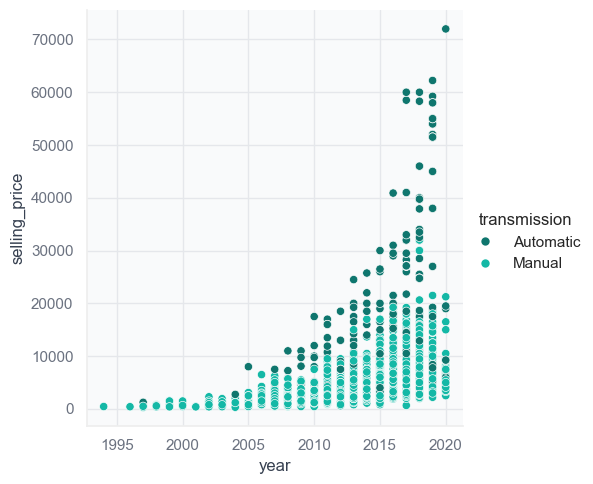

In [80]:
sns.relplot(data=df, x='year', y='selling_price', hue='transmission')

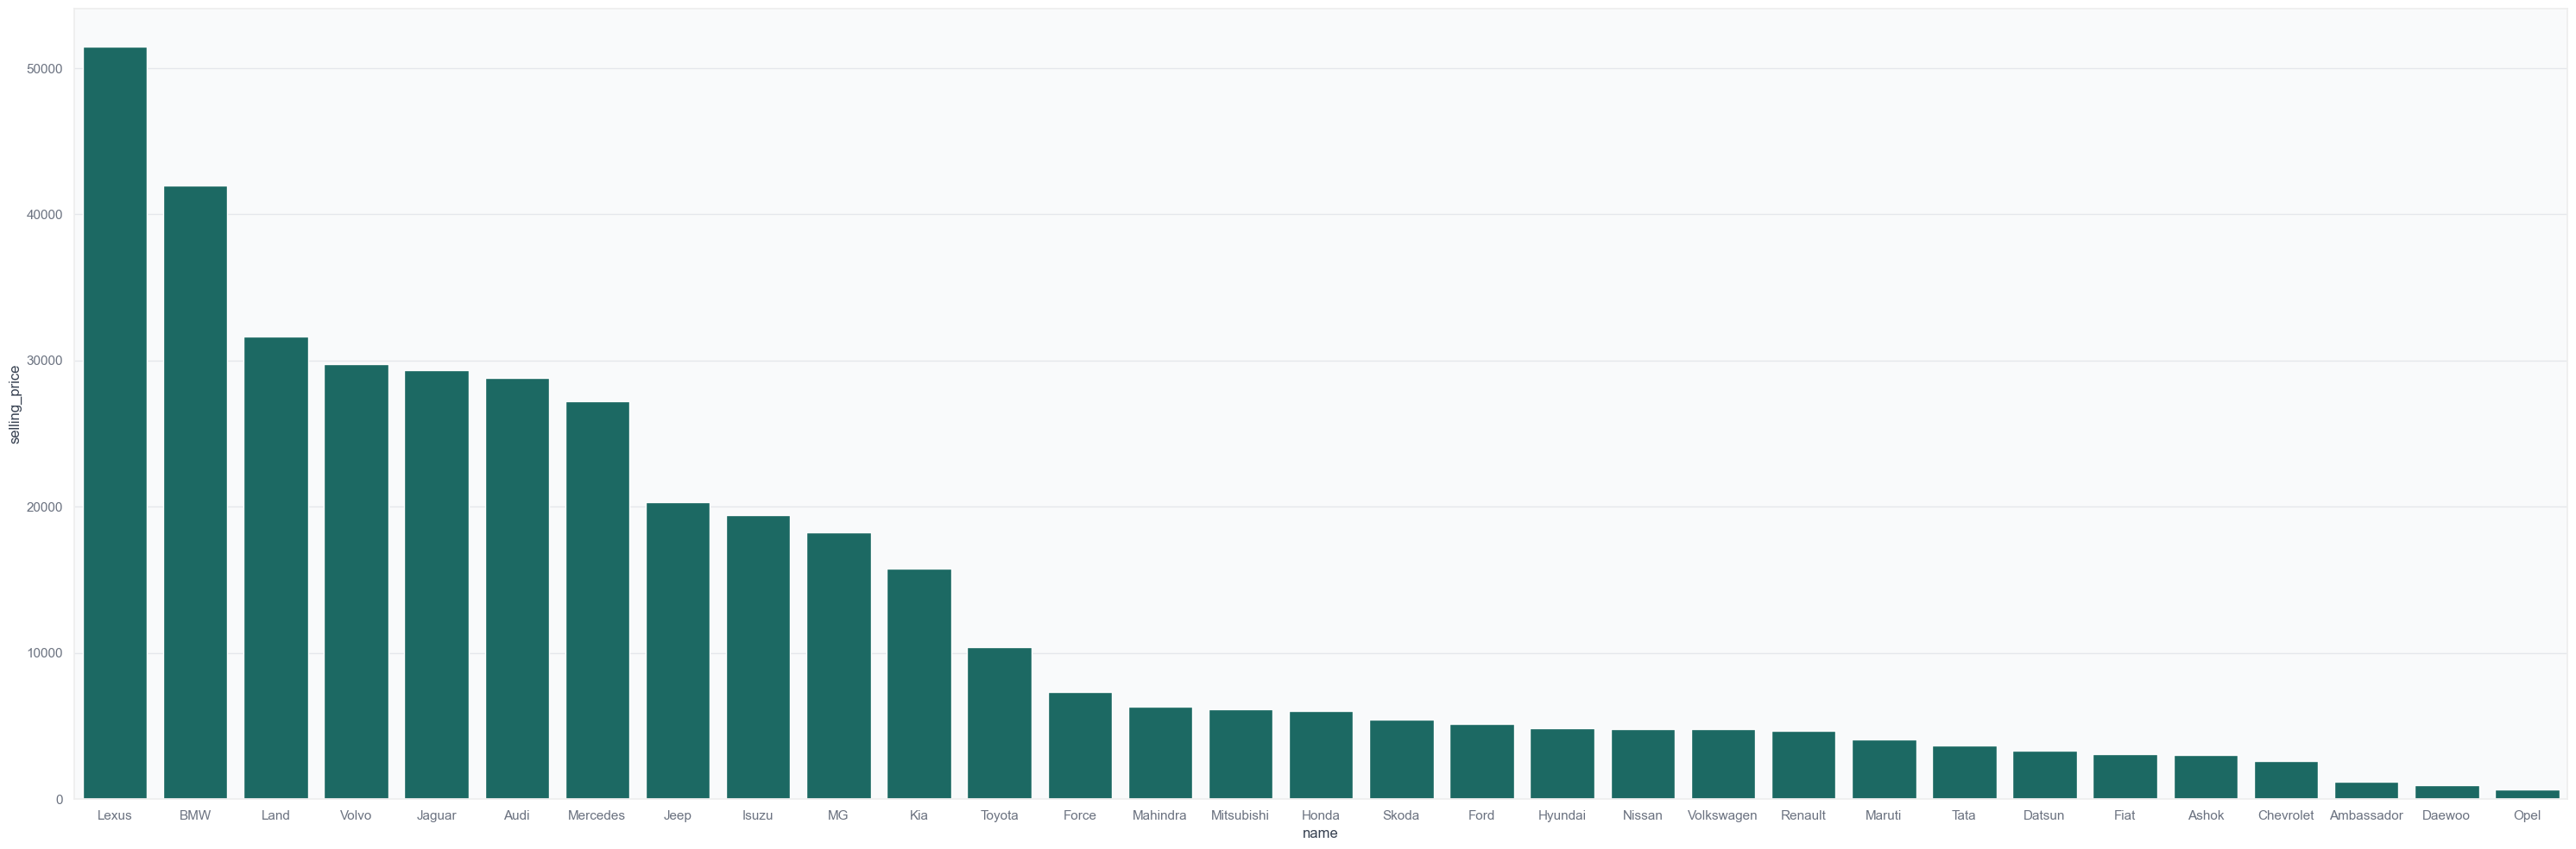

In [81]:
average_price_per_brand = df.groupby('name', as_index=False)['selling_price'].mean().sort_values(by='selling_price', ascending=False)
plt.figure(figsize=(30, 10))
sns.barplot(data=average_price_per_brand, x='name', y='selling_price')
plt.tight_layout()
plt.show()

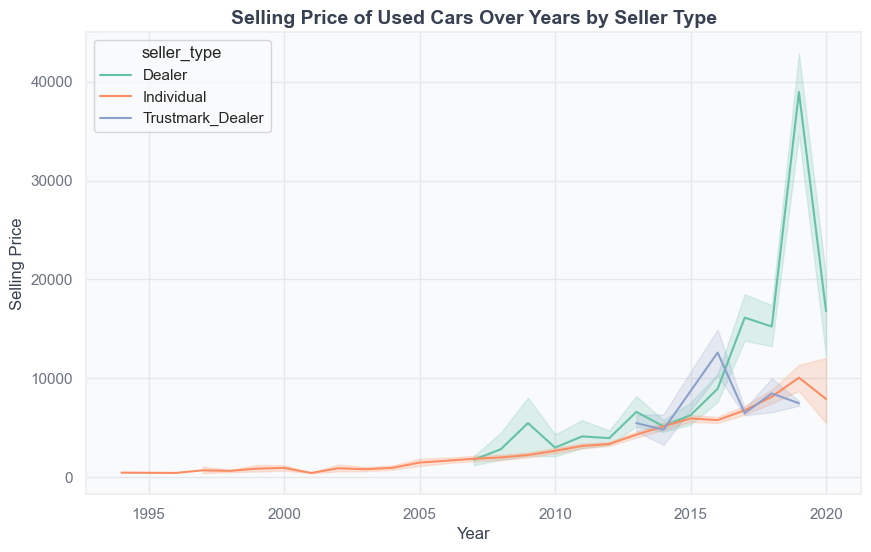

In [82]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='selling_price', hue='seller_type', palette='Set2')
plt.title('Selling Price of Used Cars Over Years by Seller Type')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

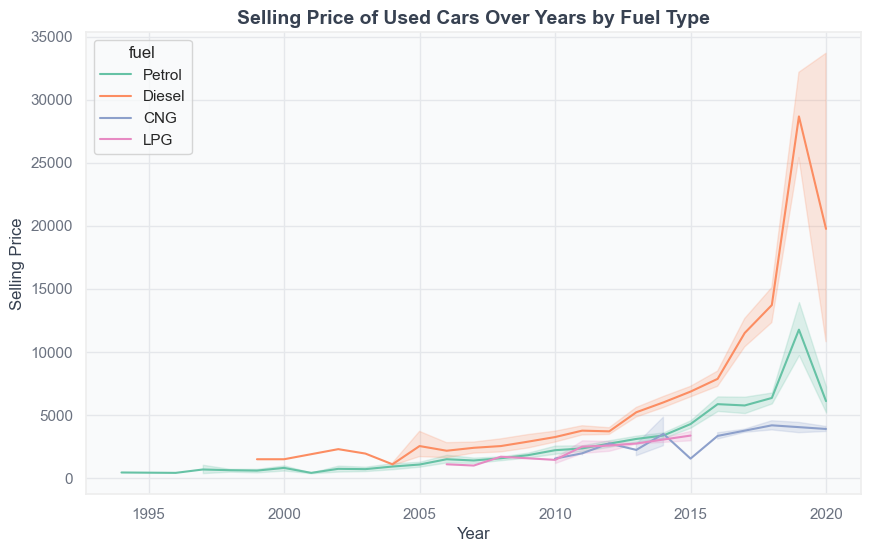

In [83]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='selling_price', hue='fuel', palette='Set2')
plt.title('Selling Price of Used Cars Over Years by Fuel Type')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

In [84]:
df.describe()

,year,selling_price,mileage,engine,max_power,seats,torque_Nm,max_rpm
count,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000
mean,2014.055330,6633.888681,19.551212,1451.212497,91.609979,5.401145,178.054135,3057.766277
std,3.790719,8322.040669,3.869431,493.532948,35.529981,0.945469,89.775202,905.033304
min,1994.000000,299.990000,9.000000,624.000000,32.800000,2.000000,48.000000,1400.000000
25%,2012.000000,2700.000000,16.800000,1197.000000,68.050000,5.000000,111.800000,2250.000000
50%,2015.000000,4550.000000,19.400000,1248.000000,82.400000,5.000000,172.500000,3000.000000
75%,2017.000000,7000.000000,22.370000,1582.000000,102.000000,5.000000,209.000000,4000.000000
max,2020.000000,72000.000000,33.440000,3604.000000,282.000000,14.000000,620.000000,5300.000000


Findings di EDA
- Dari summary yang kita peroleh pertama kali, terdapat beberapa outlier yang sangat terlihat pada data, namun saya telah handle outlier tersebut
- Saya menemukan bahwa kolom tahun memiliki korelasi yang kuat dengan selling price, ini menandakan bahwa harga mobil dengan tahun baru lebih tinggi dari tahun lama
- Saya juga menemukan bahwa mobil dengan transmission automatic memiliki harga lebih tinggi
- Saya menemukan bahwa di setiap region, ternyata hampir memiliki sifat yang sama. Saya akan menggunakan region saja sebagai fitur lokasi
- Saya juga menemukan bahwa owner memiliki korelasi yang cukup kuat juga, dimana mobil tangan pertama dan mobil test drive memiliki harga yang masih relatif tinggi
- Saya juga menemukan bahwa car brand/name berpengaruh terhadap prices. Mobil luxury/sport memiliki harga yang lebih tinggi dari city cars

### B. Build an Artificial Neural Network (ANN) with 3 hidden layers. Each hidden layer should use sigmoid as its activation function. The number of neurons in the first hidden layer should be 512 and each of the subsequent layers will have N/2 neurons where N is the number of neurons in the previous layer. Train the model for at least 20 epochs & analyze the train-validation losses!

#### B.1 Data Splitting

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [86]:
X = df.drop(columns=['selling_price', 'State or Province', 'City'])
y = df['selling_price']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### B.2 Feature Engineering

In [88]:
# year feature scaling
X_train['age'] = 2025 - X_train['year']
X_test['age']  = 2025 - X_test['year']
X_train = X_train.drop(columns=['year'])
X_test  = X_test.drop(columns=['year'])

In [89]:
# numeric feature scaling
scale_col = ['mileage', 'engine', 'max_power', 'max_rpm', 'torque_Nm', 'seats', 'age']
scaler = RobustScaler()

X_train[scale_col] = scaler.fit_transform(X_train[scale_col])
X_test[scale_col] = scaler.transform(X_test[scale_col])

In [90]:
from sklearn.preprocessing import OneHotEncoder
#categorical col encoding
cat_col_encode = ['name', 'fuel', 'seller_type', 'owner', 'Region']
oh_encoder = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')
encoded_train = oh_encoder.fit_transform(X_train[cat_col_encode])
encoded_test = oh_encoder.transform(X_test[cat_col_encode])

encoded_train_df = pd.DataFrame(encoded_train, columns=oh_encoder.get_feature_names_out(cat_col_encode), index=X_train.index)
encoded_test_df = pd.DataFrame(encoded_test, columns=oh_encoder.get_feature_names_out(cat_col_encode), index=X_test.index)

X_train = pd.concat([X_train.drop(columns=cat_col_encode), encoded_train_df], axis=1)
X_test = pd.concat([X_test.drop(columns=cat_col_encode), encoded_test_df], axis=1)

In [91]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train['transmission'] = le.fit_transform(X_train['transmission'])
X_test['transmission'] = le.transform(X_test['transmission'])
map = dict(zip(le.classes_, le.transform(le.classes_)))
map

{'Automatic': np.int64(0), 'Manual': np.int64(1)}

In [92]:
X_train.shape, X_test.shape

((3354, 55), (839, 55))

In [93]:
X_train

,transmission,mileage,engine,max_power,seats,torque_Nm,max_rpm,age,name_Ambassador,name_Ashok,...,seller_type_Trustmark_Dealer,owner_First_Owner,owner_Fourth_Above_Owner,owner_Second_Owner,owner_Test_Drive_Car,owner_Third_Owner,Region_Central,Region_East,Region_South,Region_West
3908,1,-0.387681,-0.132468,-0.032479,0.0,-0.644960,0.571429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2713,1,-1.318841,2.418182,1.054131,4.0,1.086957,-0.114286,0.2,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1071,1,0.250000,-1.166234,-0.847293,0.0,-1.067194,0.792000,-0.6,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3960,1,-1.182971,3.236364,0.541311,3.0,0.198221,0.228571,1.2,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2840,1,0.900362,0.000000,0.156695,0.0,0.197628,-0.714286,-0.2,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,1,-0.132246,-0.127273,-0.102564,0.0,-0.711462,0.800000,0.4,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
466,1,-0.856884,4.436364,-0.569801,5.0,-0.034387,-0.457143,1.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3098,1,-0.367754,0.646753,1.082621,2.0,1.185771,-0.285714,-0.8,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3779,1,-0.077899,-0.132468,-0.028490,0.0,-0.652174,0.571429,-0.2,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [94]:
X_test

,transmission,mileage,engine,max_power,seats,torque_Nm,max_rpm,age,name_Ambassador,name_Ashok,...,seller_type_Trustmark_Dealer,owner_First_Owner,owner_Fourth_Above_Owner,owner_Second_Owner,owner_Test_Drive_Car,owner_Third_Owner,Region_Central,Region_East,Region_South,Region_West
3101,1,-1.148551,3.236364,0.501425,2.0,0.197628,0.342857,0.4,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
351,1,0.288043,-0.649351,-0.452991,0.0,-0.889328,0.285714,0.2,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3920,1,0.213768,-0.649351,-0.454701,0.0,-0.889328,0.285714,-0.4,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1191,1,1.443841,0.649351,0.444444,0.0,0.197628,-0.714286,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3730,1,-0.132246,-0.132468,0.079772,0.0,-0.652174,0.571429,0.4,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,1,0.086957,-0.420779,-0.425926,0.0,-0.800000,0.857143,1.4,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1811,1,0.445652,-0.649351,-0.454416,0.0,-0.889328,0.285714,-0.6,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
914,1,-1.405797,2.418182,1.569801,2.0,1.383399,-0.171429,1.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3828,1,0.768116,0.384416,-0.370370,0.0,-0.395257,0.000000,0.6,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [95]:
y_train_log = np.log1p(y_train)

In [96]:
y_test.shape

(839,)

#### B.3 Model 1 Training

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

In [194]:
model_1 = Sequential([
    Dense(512, activation='sigmoid', input_shape=(55,)),
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(1),
])

c:\Users\johan\Bina Nusantara\Semester 5\Deep Learning\Code\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [195]:
model_1.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                │ (None, 512)            │        28,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193,025 (754.00 KB)

 Trainable params: 193,025 (754.00 KB)

 Non-trainable params: 0 (0.00 B)

In [196]:
from tensorflow.keras.losses import Huber
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

In [197]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=20, 
    restore_best_weights=True
)

In [198]:
model_1.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.RootMeanSquaredError()]
)

In [199]:
history = model_1.fit(
    X_train, y_train_log,
    epochs = 100,
    batch_size = 32,
    validation_split = 0.2,
    # callbacks = [early_stop],
    verbose = 1,
)

Epoch 1/100


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 33.1805 - mean_absolute_error: 5.5197 - root_mean_squared_error: 5.7603 - val_loss: 11.6493 - val_mean_absolute_error: 3.3161 - val_root_mean_squared_error: 3.4131
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1690 - mean_absolute_error: 2.2862 - root_mean_squared_error: 2.4837 - val_loss: 2.9328 - val_mean_absolute_error: 1.5388 - val_root_mean_squared_error: 1.7126
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0190 - mean_absolute_error: 1.2072 - root_mean_squared_error: 1.4209 - val_loss: 1.2934 - val_mean_absolute_error: 0.9298 - val_root_mean_squared_error: 1.1373
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0896 - mean_absolute_error: 0.8295 - root_mean_squared_error: 1.0439 - val_loss: 0.8386 - val_mean_absolute_error: 0.7023 - val_root_mean_squared_error: 0.9157
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8123 - mean_absolute_error: 0.6970 - root_mean_squared_error: 0.9

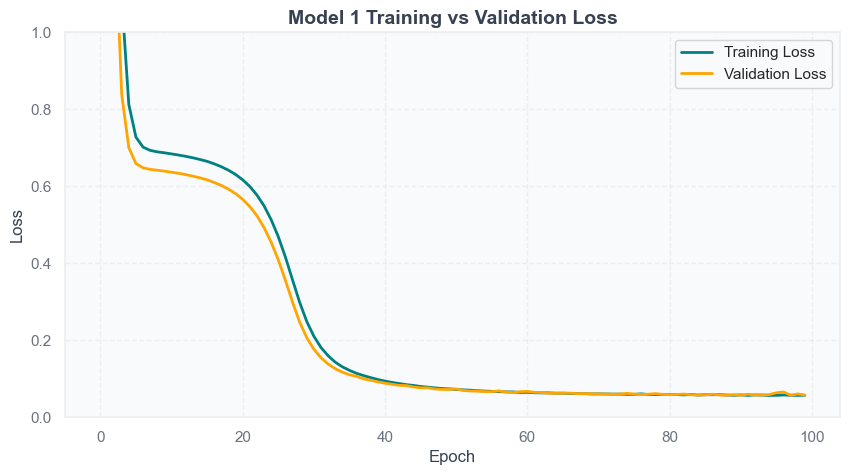

In [200]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss', color='teal', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
plt.title('Model 1 Training vs Validation Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 1.0)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

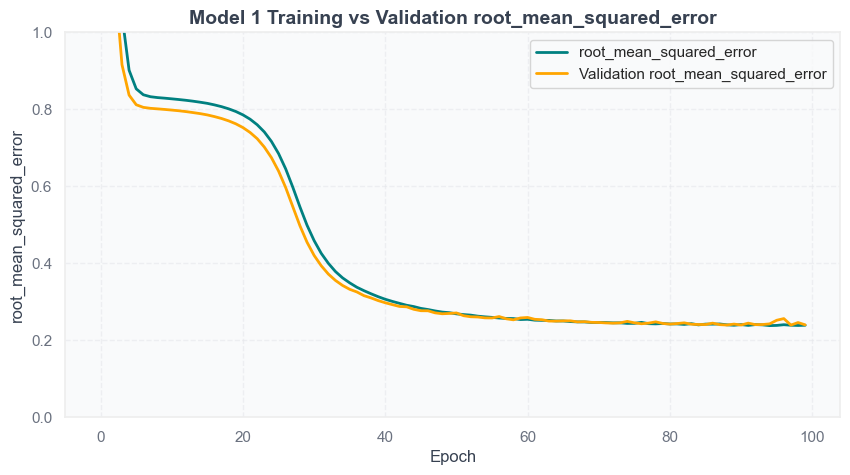

In [234]:
plt.figure(figsize=(10,5))
plt.plot(history.history['root_mean_squared_error'], label='root_mean_squared_error', color='teal', linewidth=2)
plt.plot(history.history['val_root_mean_squared_error'], label='Validation root_mean_squared_error', color='orange', linewidth=2)
plt.title('Model 1 Training vs Validation root_mean_squared_error', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('root_mean_squared_error')
plt.ylim(0, 1.0)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [201]:
train_loss_model1 = min(history.history['loss'])
val_loss_model1 = min(history.history['val_loss'])

print('best train loss model 1:', train_loss_model1)
print('best val loss model 1:', val_loss_model1)

best train loss model 1: 0.05664036422967911
best val loss model 1: 0.05729299411177635


In [ ]:
avg_train_loss_model1 = np.mean(history.history['loss'])
avg_val_loss_model1 = np.mean(history.history['val_loss'])
print(f"Average Training Loss: {avg_train_loss_model1:.4f}")
print(f"Average Validation Loss: {avg_val_loss_model1:.4f}")

Pada model pertama ini, saya menggunakan 3 hidden layer dengan activation sigmoid. Activation sigmoid sendiri merupakan sebuah fungsi aktivasi di neural network yang map input value menjadi output antara 0-1. Activation sigmoid seringkali digunakan untuk binary classification, karena outputnya dapat diinterpretasikan sebagai probabilitas. Activation sigmoid jarang digunakan dalam regression tasks. Dari beberapa sumber yang saya temukan, saya jarang sekali menemukan model Neural Network yang menggunakan aktivasi sigmoid untuk melakukan regression task. Setelah membaca beberapa discussion di pytorch.org, saya juga menemukan beberapa orang tidak menganjurkan untuk menggunakan sigmoid. Masalah utama dalam menggunakan sigmoid adalah vanishing gradient, atau gradien yang terus menyusut seiring backpropagation process.
<br><br>
Sebelumnya saya mendapatkan hasil yang sangat rendah, R2 yang didapatkan sekitar -0.05 sampai 0.20. Grafik loss yang tercipta konstan pada 0.7. Pada saat itu, saya menggunakan learning rate 0.001. Kemudian pada percobaan berikutnya, saya mencoba untuk menurunkan learning rate 0.0001, dan ternyata model berhasil keluar dari loss yang stuck di 0.07. Dapat dilihat pada sekitar epoch 20, model berhasil keluar dari local minimum.

### C. Modify the architecture of the ANN model or fine-tune it to obtain a model with lower best validation loss. Explain the reasons behind your modifications!


#### C.1 Model 2 Training

In [205]:
model_2 = Sequential([
    Dense(512, activation='relu', input_shape=(55,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1,  activation='linear'),
])

c:\Users\johan\Bina Nusantara\Semester 5\Deep Learning\Code\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [206]:
model_2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()]
)

In [207]:
model_2.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 512)            │        28,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193,025 (754.00 KB)

 Trainable params: 193,025 (754.00 KB)

 Non-trainable params: 0 (0.00 B)

In [208]:
history2 = model_2.fit(
    X_train, y_train_log,
    epochs = 100,
    batch_size = 32,
    validation_split = 0.2,
    # callbacks = [early_stop],
    verbose = 1,
)

Epoch 1/100


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.4129 - mean_absolute_error: 1.5044 - root_mean_squared_error: 2.5324 - val_loss: 0.2996 - val_mean_absolute_error: 0.3954 - val_root_mean_squared_error: 0.5474
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1925 - mean_absolute_error: 0.3189 - root_mean_squared_error: 0.4387 - val_loss: 0.1503 - val_mean_absolute_error: 0.2721 - val_root_mean_squared_error: 0.3877
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1042 - mean_absolute_error: 0.2397 - root_mean_squared_error: 0.3228 - val_loss: 0.0940 - val_mean_absolute_error: 0.2341 - val_root_mean_squared_error: 0.3066
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0710 - mean_absolute_error: 0.2020 - root_mean_squared_error: 0.2665 - val_loss: 0.0715 - val_mean_absolute_error: 0.2008 - val_root_mean_squared_error: 0.2674
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0607 - mean_absolute_error: 0.1864 - root_mean_squared_error: 0.246

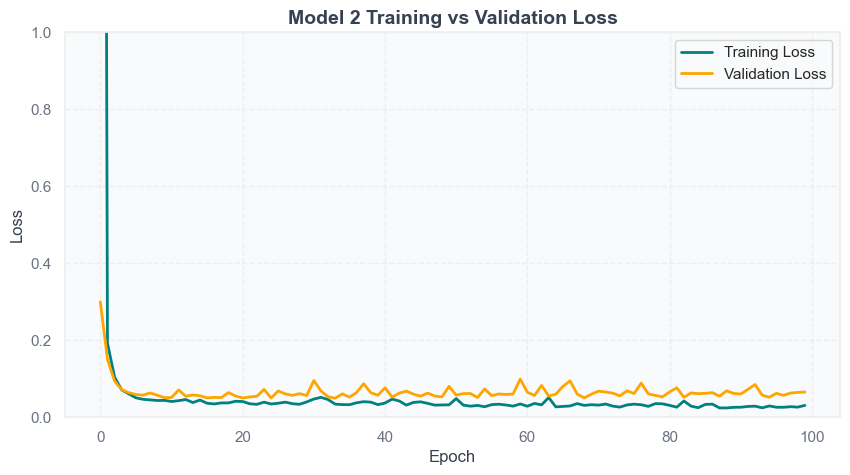

In [209]:
plt.figure(figsize=(10,5))
plt.plot(history2.history['loss'], label='Training Loss', color='teal', linewidth=2)
plt.plot(history2.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
plt.title('Model 2 Training vs Validation Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 1.0)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

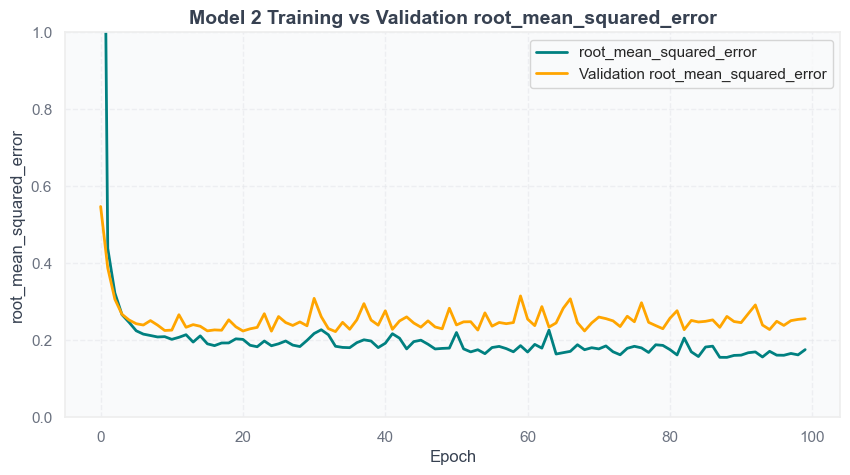

In [235]:
plt.figure(figsize=(10,5))
plt.plot(history2.history['root_mean_squared_error'], label='root_mean_squared_error', color='teal', linewidth=2)
plt.plot(history2.history['val_root_mean_squared_error'], label='Validation root_mean_squared_error', color='orange', linewidth=2)
plt.title('Model 2 Training vs Validation root_mean_squared_error', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('root_mean_squared_error')
plt.ylim(0, 1.0)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [210]:
train_loss_model2 = min(history2.history['loss'])
val_loss_model2 = min(history2.history['val_loss'])

print('best train loss model 2:', train_loss_model2)
print('best val loss model 2:', val_loss_model2)

best train loss model 2: 0.024184009060263634
best val loss model 2: 0.04950280860066414


In [ ]:
avg_train_loss_model2 = np.mean(history2.history['loss'])
avg_val_loss_model2 = np.mean(history2.history['val_loss'])
print(f"Average Training Loss: {avg_train_loss_model2:.4f}")
print(f"Average Validation Loss: {avg_val_loss_model2:.4f}")

Pada model kedua ini, saya mencoba untuk menggunakan tetap 3 Hidden layer namun menggunakan fungsi aktivasi yang berbeda, yaitu 'ReLU'. ReLU adalah Rectified Linear Unit, ini merupakan sebuah activation function non linear yang digunakan pada hidden layer. Tujuan dari ReLU adalah memperkenalkan non linearitas ke dalam model, dengan tujuannya adalah untuk memungkinkan layer mempelajari complex patern dari data. "The ReLU function is a piecewise linear function that outputs the input directly if it is positive; otherwise, it outputs zero". Dari beberapa sumber yang saya baca, ReLU dapat mengatasi vanishing gradient problem yang dapat terjadi dalam model kita. ReLU berbeda dari sigmoid dan tanh function, ReLU dapat mengatasi vanishing gradient problem. 
<br><br>
Dari graph diatas, model nampak cepat belajar. Dari epoch awal dapat terlihat model memiliki loss yang kecil < 0.2. Namun dari analisa saya, terdapat sedikit overfitting pada model, dapat dilihat ketika training loss turun menuju 0.1, namun validation loss tetap berada pada kisaran 0.04-0.1. Hal ini dapat terjadi karena, saya tidak menggunakan layer dropout pada model kedua. Layer dropout berfungsi untuk mengurangi overfitting pada model dengan cara menonaktifkan sejumlah neuron. Saya sudah mencoba model dengan menggunakan dropout, namun hasilnya train loss dan validation loss tidak konvergen bahkan setelah 100 epochs. 

#### C.2 Hyperparameter Tuning using Random Search from Keras Tuner

In [214]:
import keras_tuner as kt
from tensorflow.keras.models import Model

In [215]:
def model_builder(hp):
    hp_units1 = hp.Int('units_1', min_value=128, max_value=768, step=32)
    hp_units2 = hp.Int('units_2', min_value=128, max_value=512, step=32)
    hp_units3 = hp.Int('units_3', min_value=128, max_value=256, step=32)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-4, 1e-3, 1e-2])

    model = Sequential()
    model.add(Dense(units=hp_units1, activation='relu', input_shape=(55,)))
    model.add(Dense(units=hp_units2, activation="relu"))
    model.add(Dense(units=hp_units3, activation="relu"))
    model.add(Dense(1, activation='linear'))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.MeanAbsoluteError(), 
                 tf.keras.metrics.RootMeanSquaredError()]
    )
    return model

In [216]:
tuner = kt.RandomSearch(
    hypermodel=model_builder,
    objective='val_loss',
    max_trials=50, 
    executions_per_trial=1, 
    directory='random_search_dir',
    project_name='randomsearch_units'
)

c:\Users\johan\Bina Nusantara\Semester 5\Deep Learning\Code\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [217]:
tuner.search(
    X_train, 
    y_train_log,
    epochs=100,
    validation_split=0.2,
    # callbacks=[early_stop],
    verbose=1
)

Trial 50 Complete [00h 00m 31s]
val_loss: 0.05043184384703636

Best val_loss So Far: 0.045440882444381714
Total elapsed time: 00h 24m 15s


In [218]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(f"Best Learning Rate: {best_hps.get('learning_rate'):.4f}")
print(f"Best Units in Layer 1: {best_hps.get('units_1')}")
print(f"Best Units in Layer 2: {best_hps.get('units_2')}")
print(f"Best Units in Layer 3: {best_hps.get('units_3')}")

Best Hyperparameters:
Best Learning Rate: 0.0100
Best Units in Layer 1: 384
Best Units in Layer 2: 320
Best Units in Layer 3: 224


In [219]:
best_model = tuner.get_best_models(num_models=1)[0]

c:\Users\johan\Bina Nusantara\Semester 5\Deep Learning\Code\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\johan\Bina Nusantara\Semester 5\Deep Learning\Code\venv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


### D. Evaluate both models on a test dataset. Analyze the results & make a clear conclusion!

In [236]:
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

#### D.1 Model 1 (From Question B) Evaluation

In [237]:
y_pred__model1_log = model_1.predict(X_test)
y_pred_model1 = np.expm1(y_pred__model1_log)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Text(0.5, 1.0, 'Model 1 Regression')

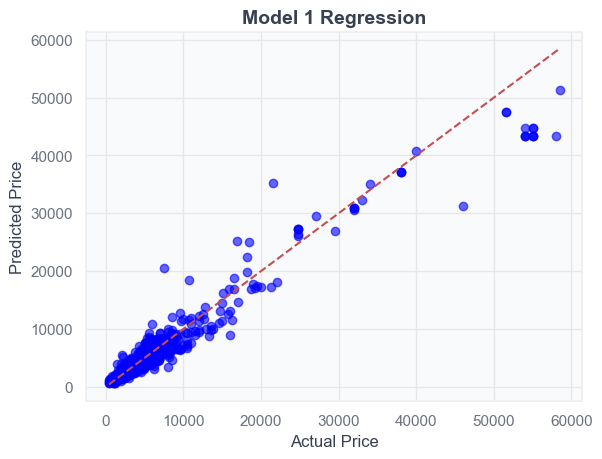

In [238]:
plt.scatter(y_test, y_pred_model1, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Model 1 Regression')

In [239]:
r2_model1 = r2_score(y_test, y_pred_model1)
rmse_model1 = root_mean_squared_error(y_test, y_pred_model1)
mae_model1 = mean_absolute_error(y_test, y_pred_model1)
mape_model1 = mean_absolute_percentage_error(y_test, y_pred_model1)
print('r2 score: ', r2_model1)
print('rmse score: ', rmse_model1)
print('mae score: ', mae_model1)
print('mape score: ', mape_model1)

r2 score:  0.939077310244395
rmse score:  1974.1206294524745
mae score:  1054.4211357864178
mape score:  0.19042843508572407


In [240]:
pd.DataFrame(list(zip(y_test,y_pred_model1)), columns = ['Actual Prices', 'Predicted Prices'])

,Actual Prices,Predicted Prices
0,7500.00,[6718.057]
1,2549.99,[2726.264]
2,4400.00,[4346.219]
3,5250.00,[6283.131]
4,3250.00,[2979.7988]
...,...,...
834,1650.00,[1511.0662]
835,4690.00,[5027.2734]
836,2299.99,[3346.1604]
837,2000.00,[2049.4214]


Setelah melakukan training, selanjutnya adalah kita mencoba untuk test model dengan data test yang sebelumnya belum pernah dilihat oleh model selama training. Ketika model diuji dengan data test, model menunjukkan hasil yang cukup baik dimana R2 berada pada nilai 0.93. Ini artinya model dapat memprediksi sebagian besar dari variabilitas data. MAE yang didapatkan juga cukup rendah yaitu 1054 USD, yang artinya ketika kita predict sebuah price, maka prediksi kita meleset +/- 1054 USD. Contoh prediksi dapat dilihat pada tabel diatas, contohnya seperti actual prices adalah 7500 kemudian di prediksi 6718. Dari graph Actual Price dan Predicted Price, kita dapat melihat bahwa hasil prediksi sangat mendekati garis regression sebenarnya.

#### D.2 Model 2 (From Question C) Evaluation

In [241]:
y_pred__model2_log = model_2.predict(X_test)
y_pred_model2 = np.expm1(y_pred__model2_log)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Text(0.5, 1.0, 'Model 2 Regression')

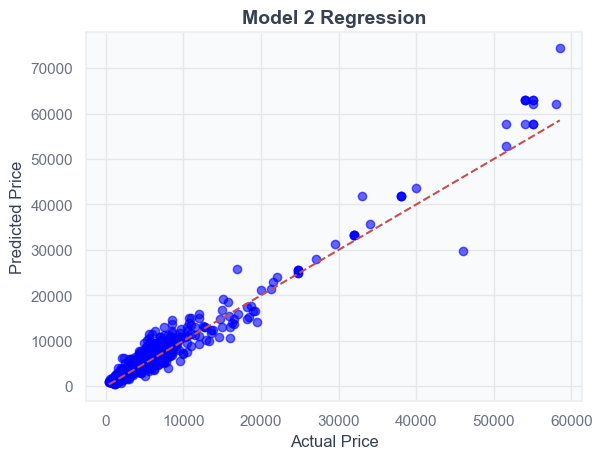

In [242]:
plt.scatter(y_test, y_pred_model2, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Model 2 Regression')

In [243]:
r2_model2 = r2_score(y_test, y_pred_model2)
rmse_model2 = root_mean_squared_error(y_test, y_pred_model2)
mape_model2 = mean_absolute_percentage_error(y_test, y_pred_model2)
mae_model2 = mean_absolute_error(y_test, y_pred_model2)
print('r2 score: ', r2_model2)
print('rmse score: ', rmse_model2)
print('mae score: ', mae_model2)
print('mape score: ', mape_model2)

r2 score:  0.9452996145469987
rmse score:  1870.5931754153523
mae score:  1167.304065527751
mape score:  0.24330199954632592


In [244]:
pd.DataFrame(list(zip(y_test,y_pred_model2)), columns = ['Actual Prices', 'Predicted Prices'])

,Actual Prices,Predicted Prices
0,7500.00,[8484.297]
1,2549.99,[3002.026]
2,4400.00,[3653.9211]
3,5250.00,[6393.04]
4,3250.00,[4019.371]
...,...,...
834,1650.00,[1945.8276]
835,4690.00,[4319.9355]
836,2299.99,[2426.2905]
837,2000.00,[2313.9443]


Pada model kedua yang menggunakan relu, model mendapatkan sedikit peningkatan pada R2, yaitu model kedua mendapatkan R2 0.945. Nilai ini berarti model dapat menjelaskan sebagian besar variabilitas dari data. Dengan skor R2 0.945, ini menandakan performa model sudah sangat baik untuk memprediksi harga used car price dengan dataset yang ada. Selain itu, saya juga menganalisa satu perbedaan pada model kedua ini, yaitu bahwa model kedua lebih berani untuk menebak harga tinggi dibandingkan model pertama. Walaupun mendapatkan MAE yang sedikit lebih tinggi dari model pertama, namun model kedua berhasil untuk achieve RMSE yang lebih rendah.

#### D.3 Best Model from Hyperparameter Tuning using Grid Search

In [245]:
y_pred__best_log = best_model.predict(X_test)
y_pred_best = np.expm1(y_pred__best_log)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Text(0.5, 1.0, 'Best Model Regression')

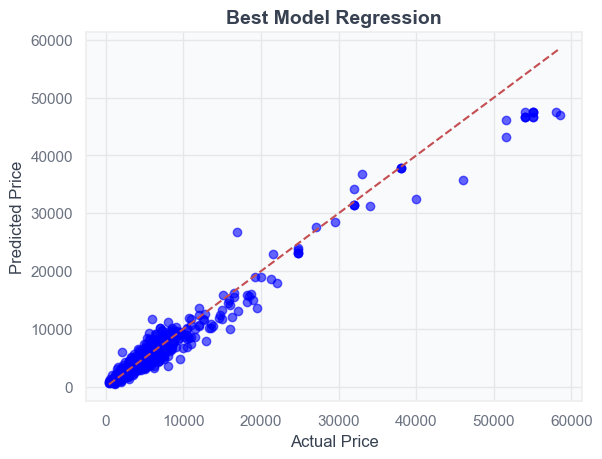

In [246]:
plt.scatter(y_test, y_pred_best, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Best Model Regression')

In [248]:
r2_best = r2_score(y_test, y_pred_best)
rmse_best = root_mean_squared_error(y_test, y_pred_best)
mape_best = mean_absolute_percentage_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

print('r2 score: ', r2_best)
print('rmse score: ', rmse_best)
print('mae score: ', mae_best)
print('mape score: ', mape_best)

r2 score:  0.9593902080457286
rmse score:  1611.756886634262
mae score:  917.583635755864
mape score:  0.17480451226166488


In [249]:
pd.DataFrame(list(zip(y_test,y_pred_best)), columns = ['Actual Prices', 'Predicted Prices'])

,Actual Prices,Predicted Prices
0,7500.00,[8273.298]
1,2549.99,[2858.255]
2,4400.00,[4348.21]
3,5250.00,[5678.492]
4,3250.00,[3291.5627]
...,...,...
834,1650.00,[1436.5872]
835,4690.00,[4207.1245]
836,2299.99,[2186.8264]
837,2000.00,[1939.1747]


Saya juga mencoba untuk menggunakan Random Search dengan tujuan mencari kombinasi lain yang terbaik bagi model saya. Setelah melakukan 50x Random Search, Model menemukan parameter terbaiknya yaitu, 3 Hidden layer dengan masing2 neuronnya adalah 384, 320, 224. Learning rate terbaik yang ditemukan adalah 0.01, dan model ini menghasilkan R2 yang lebih tinggi lagi daripada kedua model pertama, yaitu model achieve R2 score 0.959 atau mendekati 0.96. Ini menandakan model telah menemukan parameter terbaiknya untuk melakukan tasks ini.

#### D.4 Comparison

In [253]:
result = {
    'Model': ['Model 1 (Sigmoid)', 'Model 2 (ReLU)', 'Best Model (Hyperparameter Tuning)'],
    'R2 Score': [r2_model1, r2_model2, r2_best],
    'RMSE Score': [rmse_model1, rmse_model2, rmse_best],
    'MAE Score': [mae_model1, mae_model2, mae_best],
    'MAPE Score': [mape_model1, mape_model2, mape_best]
}

# Membuat DataFrame
df_res = pd.DataFrame(result)

df_styled = df_res.set_index('Model').style.format({
    'R2 Score': '{:.4f}',
    'RMSE Score': '{:,.2f}',
    'MAE Score': '{:,.2f}',
    'MAPE Score': '{:.4%}'
}).set_caption("Comparison of Model Performance Metrics")

df_styled

,R2 Score,RMSE Score,MAE Score,MAPE Score
Model,,,,
Model 1 (Sigmoid),0.9391,"1,974.12","1,054.42",19.0428%
Model 2 (ReLU),0.9453,"1,870.59","1,167.30",24.3302%
Best Model (Hyperparameter Tuning),0.9594,"1,611.76",917.58,17.4805%


#### D.5 Conclusion

Dari ketiga model yang telah saya training untuk menyelesaikan task regresi used car price ini, didapatkan bahwa model 3 (best model) yang diperoleh dari hyperparameter tuning memberikan hasil yang terbaik di seluruh metrik utama yang digunakan. Peningkatan ini menunjukkan bahwa Random Search (hyperparameter tuning) yang dilakukan memiliki dampak besar terhadap performa model. Pada random search saya tuning jumlah neuron per hidden layer dan juga learning rate nya. <br> <br>
Findings:
- Model 1 cukup baik, namun sempat tertahan/stagnan lossnya akibat sifat dari fungsi sigmoid yang kurang cocok dalam regression tasks. Namun dengan learning rate yang lebih kecil, model akhirnya mampu keluar dari kondisi stagnan dan mendapatkan hasil yang cukup baik
- Model 2 memberikan peningkatan pada performa, hal ini diakibatkan karena penggunaan fungsi ReLU sebagai activation function. ReLU dapat memperbaiki vanishing gradient problem. Namun ketika kita lihat dari metricsnya, dibandingkan dengan model 1, MAE dan MAPE pada model 2 justru kalah dengan model 1. Hal ini bisa disebabkan karena hyperparameter yang tidak optimal
- Model 3 memberikan hasil yang terbaik, hyperparameter tuning terbukti berhasil dan menghasilkan model dengan performa yang sangat baik dan unggul di seluruh metrics utama yang diuji. Ini menunjukkan bahwa, untuk meningkatkan performa model dalam regresi, bukan hanya mengenai activation function, namun juga kecocokan dengan hyperparameter yang tepat. ReLU dapat bekerja dengan baik ketika model berjalan dengan hyperparameter yang sesuai.

Rekomendasi:
- Untuk meningkatkan performa model dan mencegah overfitting, dapat ditambahkan layer dropout ke dalam model
- Dataset dapat ditambah agar model dapat belajar data yang lebih bervariasi
- Mungkin dapat menambah layer untuk menangkap pola/pattern yang lebih kompleks